# Setup
- 참고문서
  - https://wikidocs.net/book/14473
  - https://wikidocs.net/book/14314
  - https://github.com/teddylee777/langchain-kr

## Install

In [176]:
!pip install -U langchain langchain-community langchain-experimental langchain-core langchain-openai langsmith langchainhub

## OpenAI Key 등록
- [OpenAI Key 발급방법](https://teddylee777.github.io/openai/openai-api-key/)
- [OpenAI 요금](https://openai.com/api/pricing/)

In [2]:
import os

os.environ['OPENAI_API_KEY'] = '생성한 키 입력'

## 구글 드라이브 연결(데이터 로드를 위해서)

In [69]:
# 구글 드라이브 연결(데이터 로드를 위해서)
try:
    from google.colab import drive

    drive.mount('/content/data')
    DATA_PATH = "/content/data/MyDrive/google_lecture/06. deep learning/4. LLM Pytorch/data/"
except:
    DATA_PATH = "./data/"

Mounted at /content/data


# Prompt
- 프롬프트는 사용자와 언어 모델 간의 대화에서 질문이나 요청의 형태로 제시되는 입력문입니다. 이는 모델이 어떤 유형의 응답을 제공할지 결정하는 데 중요한 역할을 합니다.

## 프롬프트 작성방법

1. 명확성과 구체성
  - 질문은 명확하고 구체적이어야 합니다. 모호한 질문은 LLM 모델의 혼란을 초래할 수 있기 때문입니다.
  - 예시: "다음 주 주식 시장에 영향을 줄 수 있는 예정된 이벤트들은 무엇일까요?"는 "주식 시장에 대해 알려주세요."보다 더 구체적이고 명확한 질문입니다.
2. 배경 정보를 포함
  - 모델이 문맥을 이해할 수 있도록 필요한 배경 정보를 제공하는 것이 좋습니다. 이는 환각 현상(hallucination)이 발생할 위험을 낮추고, 관련성 높은 응답을 생성하는 데 도움을 줍니다.
  - 예시: "2020년 미국 대선의 결과를 바탕으로 현재 정치 상황에 대한 분석을 해주세요."
3. 간결함
  - 핵심 정보에 초점을 맞추고, 불필요한 정보는 배제합니다. 프롬프트가 길어지면 모델이 덜 중요한 부분에 집중하거나 상당한 영향을 받는 문제가 발생할 수 있습니다.
  - 예시: "2021년에 발표된 삼성전자의 ESG 보고서를 요약해주세요."
4. 열린 질문 사용
  - 열린 질문을 통해 모델이 자세하고 풍부한 답변을 제공하도록 유도합니다. 단순한 '예' 또는 '아니오'로 대답할 수 있는 질문보다는 더 많은 정보를 제공하는 질문이 좋습니다.
  - 예시: "신재생에너지에 대한 최신 연구 동향은 무엇인가요?"
5. 명확한 목표 설정
  - 얻고자 하는 정보나 결과의 유형을 정확하게 정의합니다. 이는 모델이 명확한 지침에 따라 응답을 생성하도록 돕습니다.
  - 예시: "AI 윤리에 대한 문제점과 해결 방안을 요약하여 설명해주세요."
6. 언어와 문체
  - 대화의 맥락에 적합한 언어와 문체를 선택합니다. 이는 모델이 상황에 맞는 표현을 선택하는데 도움이 됩니다.
  - 예시: 공식적인 보고서를 요청하는 경우, "XX 보고서에 대한 전문적인 요약을 부탁드립니다."와 같이 정중한 문체를 사용합니다.

## 프롬프트 템플릿
- PromptTemplate은 단일 문장 또는 간단한 명령을 입력하여 단일 문장 또는 간단한 응답을 생성하는 데 사용되는 프롬프트를 구성할 수 있는 문자열 템플릿입니다.
- Python의 문자열 포맷팅을 사용하여 동적으로 특정한 위치에 입력 값을 포함시킬 수 있습니다.

### 문자열 템플릿

다음 예제는 `langchain_core.prompts` 모듈의 `PromptTemplate` 클래스를 사용하여, 'name'과 'age'라는 두 개의 변수를 포함하는 프롬프트 템플릿을 정의하고 있습니다. 이 템플릿을 이용하여 실제 입력값을 해당 위치에 채워 넣어 완성된 프롬프트를 생성하는 과정을 보여줍니다.
1. `PromptTemplate.from_template` 메서드를 사용하여 문자열 템플릿으로부터 `PromptTemplate` 인스턴스를 생성합니다. 이때, `template_text` 변수에 정의된 템플릿 문자열이 사용됩니다.
2. 생성된 `PromptTemplate` 인스턴스의 `format` 메서드를 사용하여, 실제 'name'과 'age' 값으로 템플릿에 채워서 프롬프트를 구성합니다. 여기서는 `name="홍길동", age=30`으로 지정하여 호출합니다.
3. 결과적으로, `filled_prompt` 변수에는 "안녕하세요, 제 이름은 홍길동이고, 나이는 30살입니다."라는 완성된 프롬프트 문자열이 저장됩니다.

In [3]:
from langchain_core.prompts import PromptTemplate

# 'name'과 'age'라는 두 개의 변수를 사용하는 프롬프트 템플릿을 정의
template_text = "안녕하세요, 제 이름은 {name}이고, 나이는 {age}살입니다."

template_text

'안녕하세요, 제 이름은 {name}이고, 나이는 {age}살입니다.'

In [4]:
# PromptTemplate 인스턴스를 생성
prompt_template = PromptTemplate.from_template(template_text)

prompt_template

PromptTemplate(input_variables=['age', 'name'], template='안녕하세요, 제 이름은 {name}이고, 나이는 {age}살입니다.')

In [5]:
# 템플릿에 값을 채워서 프롬프트를 완성
filled_prompt = prompt_template.format(name="홍길동", age=30)

filled_prompt

'안녕하세요, 제 이름은 홍길동이고, 나이는 30살입니다.'

### 프롬프트 템플릿 결합

`PromptTemplate` 클래스는 문자열을 기반으로 프롬프트 템플릿을 생성하고, + 연산자를 사용하여 직접 결합하는 동작을 지원합니다. `PromptTemplate` 인스턴스 간의 직접적인 결합뿐만 아니라, 이들 인스턴스와 문자열로 이루어진 템플릿을 결합하여 새로운 `PromptTemplate` 인스턴스를 생성하는 것도 가능합니다.
- 문자열 + 문자열
- PromptTemplate + PromptTemplate
- PromptTemplate + 문자열

In [6]:
# 문자열 템플릿 결합 (PromptTemplate + PromptTemplate + 문자열)
combined_prompt = (
              prompt_template
              + PromptTemplate.from_template("\n\n아버지를 아버지라 부를 수 없습니다.")
              + "\n\n{language}로 번역해주세요."
)

combined_prompt

PromptTemplate(input_variables=['age', 'language', 'name'], template='안녕하세요, 제 이름은 {name}이고, 나이는 {age}살입니다.\n\n아버지를 아버지라 부를 수 없습니다.\n\n{language}로 번역해주세요.')

- `format` 메소드를 사용하여 앞에서 생성한 템플릿의 매개변수에 입력 값을 지정합니다.
- LLM에게 전달할 프롬프트가 완성되는데, 주어진 문장을 "영어로 번역해주세요." 라는 지시사항을 포함하고 있습니다.

In [7]:
combined_prompt.format(name="홍길동", age=30, language="영어")

'안녕하세요, 제 이름은 홍길동이고, 나이는 30살입니다.\n\n아버지를 아버지라 부를 수 없습니다.\n\n영어로 번역해주세요.'

- ChatOpenAI 인스턴스를 생성하여 프롬프트 텍스트를 전달하고, 모델의 출력을 StrOutputParser를 통해 문자열로 변환하는 LLM 체인을 구성합니다.
- invoke 메소드를 사용하여 파이프라인을 실행하고, 최종적으로 문자열 출력을 얻습니다.
- 모델의 응답은 프롬프트에 주어진 문장을 영어로 번역한 텍스트가 출력됩니다.

In [8]:
from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import StrOutputParser

# 모델 선언
llm = ChatOpenAI(model="gpt-3.5-turbo-0125")
# LLM 체인 선언
chain = combined_prompt | llm | StrOutputParser()
# 실행
chain.invoke({"age":30, "language":"영어", "name":"홍길동"})

'Hello, my name is Hong Gil-dong and I am 30 years old.\n\nI cannot call my father "father".'

## 챗 프롬프트 템플릿
- ChatPromptTemplate은 대화형 상황에서 여러 메시지 입력을 기반으로 단일 메시지 응답을 생성하는 데 사용됩니다.
- 이는 대화형 모델이나 챗봇 개발에 주로 사용됩니다.
- 입력은 여러 메시지를 원소로 갖는 리스트로 구성되며, 각 메시지는 역할(role)과 내용(content)으로 구성됩니다.

### Message 유형

- SystemMessage: 시스템의 기능을 설명합니다.
- HumanMessage: 사용자의 질문을 나타냅니다.
- AIMessage: AI 모델의 응답을 제공합니다.
- FunctionMessage: 특정 함수 호출의 결과를 나타냅니다.
- ToolMessage: 도구 호출의 결과를 나타냅니다.

### 튜플 형태의 메시지 리스트

- `ChatPromptTemplate.from_messages` 메서드를 사용하여 메시지 리스트로부터 `ChatPromptTemplate` 인스턴스를 생성하는 방식은 대화형 프롬프트를 생성하는 데 유용합니다.
- 이 메서드는 2-튜플 형태의 메시지 리스트를 입력 받아, 각 `메시지의 역할(type)`과 `내용(content)`을 기반으로 프롬프트를 구성합니다.

다음 예시에서 `ChatPromptTemplate.from_messages` 메서드는 전달된 메시지들을 기반으로 프롬프트를 구성합니다. 그리고 `format_messages` 메서드는 사용자의 입력을 프롬프트에 동적으로 삽입하여, 최종적으로 대화형 상황을 반영한 메시지 리스트를 생성합니다. 시스템은 자신의 기능을 설명하고, 사용자는 천문학 관련 질문을 합니다.

In [9]:
# 2-튜플 형태의 메시지 목록으로 프롬프트 생성 (type, content)

from langchain_core.prompts import ChatPromptTemplate

chat_prompt = ChatPromptTemplate.from_messages([
    ("system", "이 시스템은 천문학 질문에 답변할 수 있습니다."),
    ("user", "{user_input}"),
])

messages = chat_prompt.format_messages(user_input="태양계에서 가장 큰 행성은 무엇인가요?")
messages

[SystemMessage(content='이 시스템은 천문학 질문에 답변할 수 있습니다.'),
 HumanMessage(content='태양계에서 가장 큰 행성은 무엇인가요?')]

- chat_prompt, llm, StrOutputParser()를 순차적인 파이프라인으로 연결하여 구성된 chain을 사용합니다.
- invoke 메소드를 호출하면 사용자 입력을 받아 언어 모델에 전달하고, 모델의 응답을 처리하여 최종 문자열 결과를 반환하는 과정을 자동화하여 수행합니다.
- 사용자는 천문학 관련 질문에 대한 언어 모델의 응답을 얻을 수 있습니다.

In [10]:
from langchain_core.output_parsers import StrOutputParser

chain = chat_prompt | llm | StrOutputParser()

chain.invoke({"user_input": "태양계에서 가장 큰 행성은 무엇인가요?"})

'태양계에서 가장 큰 행성은 목성입니다. 목성은 지름이 약 142,984 km로 태양계에서 가장 큰 행성이며, 대기권과 가스로 이루어져 있습니다.'

### MessagePromptTemplate 활용

- 다음 예제는 `SystemMessagePromptTemplate`와 `HumanMessagePromptTemplate`를 사용하여 천문학 질문에 답변할 수 있는 시스템에 대한 대화형 프롬프트를 생성합니다.
- `ChatPromptTemplate.from_messages` 메소드를 통해 시스템 메시지와 사용자 메시지 템플릿을 포함하는 챗 프롬프트를 구성합니다.
- 이후, `chat_prompt.format_messages` 메서드를 사용하여 사용자의 질문을 포함한 메시지 리스트를 동적으로 생성합니다.

In [11]:
# MessagePromptTemplate 활용

from langchain_core.prompts import SystemMessagePromptTemplate,  HumanMessagePromptTemplate

chat_prompt = ChatPromptTemplate.from_messages(
    [
        SystemMessagePromptTemplate.from_template("이 시스템은 천문학 질문에 답변할 수 있습니다."),
        HumanMessagePromptTemplate.from_template("{user_input}"),
    ]
)

messages = chat_prompt.format_messages(user_input="태양계에서 가장 큰 행성은 무엇인가요?")
messages

[SystemMessage(content='이 시스템은 천문학 질문에 답변할 수 있습니다.'),
 HumanMessage(content='태양계에서 가장 큰 행성은 무엇인가요?')]

- 이렇게 생성된 메시지 리스트는 대화형 인터페이스나 언어 모델과의 상호작용을 위한 입력으로 사용될 수 있습니다.
- 각 메시지는 role (메시지를 말하는 주체, 여기서는 system 또는 user)과 content (메시지의 내용) 속성을 포함합니다.
- 이 구조는 시스템과 사용자 간의 대화 흐름을 명확하게 표현하며, 언어 모델이 이를 기반으로 적절한 응답을 생성할 수 있도록 돕습니다.

In [12]:
chain = chat_prompt | llm | StrOutputParser()

chain.invoke({"user_input": "태양계에서 가장 큰 행성은 무엇인가요?"})

'태양계에서 가장 큰 행성은 목성입니다. 목성은 지름이 약 142,984 km로 태양계에서 가장 큰 행성이며, 우리가 알고 있는 모든 행성들 중에서 가장 눈에 띄는 크기를 가지고 있습니다.'

# Model
- 랭체인 문서에 따르면 `LLM`과 `Chat Model` 클래스는 각각 다른 형태의 입력과 출력을 다루는 언어 모델을 나타냅니다.
- 이 두 모델은 각기 다른 특성과 용도를 가지고 있어, 사용자의 요구사항에 맞게 선택하여 사용할 수 있습니다.
- 일반적으로 `LLM`은 주로 단일 요청에 대한 복잡한 출력을 생성하는 데 적합한 반면, `Chat Model`은 사용자와의 상호작용을 통한 연속적인 대화 관리에 더 적합합니다.

## Large Language Models (LLMs)

- `기능`
  - LLM 클래스는 텍스트 문자열을 입력으로 받아 처리한 후, 텍스트 문자열을 반환합니다. 이 모델은 광범위한 언어 이해 및 텍스트 생성 작업에 사용됩니다. 예를 들어, 문서 요약, 콘텐츠 생성, 질문에 대한 답변 생성 등 복잡한 자연어 처리 작업을 수행할 수 있습니다.
- `예시`
  - 사용자가 특정 주제에 대한 설명을 요청할 때, LLM은 주어진 텍스트 입력을 바탕으로 상세한 설명을 생성하여 반환할 수 있습니다.

### LLM 인터페이스 특징

- `표준화된 인터페이스`
  - 랭체인의 LLM 클래스는 사용자가 문자열을 입력으로 제공하면, 그에 대한 응답으로 문자열을 반환하는 표준화된 방식을 제공합니다.
  - 이는 다양한 LLM 제공 업체 간의 호환성을 보장하며, 사용자는 복잡한 API 변환 작업 없이 여러 LLM을 쉽게 탐색하고 사용할 수 있습니다.
- `다양한 LLM 제공 업체 지원`
  - 랭체인은 OpenAI의 GPT 시리즈, Cohere의 LLM, Hugging Face의 Transformer 모델 등 다양한 LLM 제공 업체와의 통합을 지원합니다.
  - 이를 통해 사용자는 자신의 요구 사항에 가장 적합한 모델을 선택하여 사용할 수 있습니다.

### 예제
- 다음 예제는 LLM을 사용하여 직접적인 질문에 대한 답변을 생성하는 방법을 보여줍니다.
- langchain_openai 모듈의 OpenAI 클래스를 사용하여 LLM 인스턴스를 생성합니다.
- invoke 메소드를 사용하여 질문("한국의 대표적인 관광지 3군데를 추천해주세요.")을 LLM에 전달하고, 관광지 추천을 받습니다.

In [13]:
from langchain_openai import OpenAI

llm = OpenAI()

llm.invoke("한국의 대표적인 관광지 3군데를 추천해주세요.")

'\n\n1. 경복궁\n서울에 위치한 경복궁은 조선 시대 왕들이 사용한 궁궐로, 현재는 국립문화재로 지정되어 있습니다. 아름다운 정원과 멋진 건축물을 감상할 수 있으며, 전통적인 한복을 입고 사진을 찍는 체험도 가능합니다.\n\n2. 제주도\n제주도는 우리나라에서 가장 인기 있는 여행지 중 하나로, 아름다운 자연 경관과 다양한 액티비티를 즐길 수 있습니다. 해변에서 바다를 바라보며 산책하거나, 유명한 용두암을 방문하여 산책하는 것도 추천합니다.\n\n3. 부산 해운대해수욕장\n부산의 대표적인 관광지 중 하나인'

- `temperature`
  - 사용할 샘플링 온도는 0과 2 사이에서 선택합니다. 0.8과 같은 높은 값은 출력을 더 무작위하게 만들고, 0.2와 같은 낮은 값은 출력을 더 집중되고 결정론적으로 만듭니다.
- `max_tokens`
  - 채팅 완성에서 생성할 토큰의 최대 개수입니다.
- `model_name`
  - 적용 가능한 모델 리스트
  - https://platform.openai.com/docs/models

In [14]:
# 객체 생성
llm = ChatOpenAI(
    temperature=0,  # 창의성 (0.0 ~ 2.0)
    max_tokens=2048,  # 최대 토큰수
    model_name="gpt-3.5-turbo",  # 모델명
)

# 질의내용
question = "대한민국의 수도는 뭐야?"

# 질의
print(f"[답변]: {llm.predict(question)}")

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The method `BaseChatModel.predict` was deprecated in langchain-core 0.1.7 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(


[답변]: 대한민국의 수도는 서울이야.


## Chat Model

- `기능`
  - Chat Model 클래스는 메시지의 리스트를 입력으로 받고, 하나의 메시지를 반환합니다.
  - 이 모델은 대화형 상황에 최적화되어 있으며, 사용자와의 연속적인 대화를 처리하는 데 사용됩니다.
  - Chat Model은 대화의 맥락을 유지하면서 적절한 응답을 생성하는 데 중점을 둡니다.
- `예시`
  - 사용자가 챗봇과 대화하는 상황에서, 사용자의 질문과 이전 대화 내용을 고려하여 적절한 답변을 생성합니다.

### Chat Model 인터페이스 특징

- `대화형 입력과 출력`
  - Chat Model은 대화의 연속성을 고려하여 입력된 메시지 리스트를 기반으로 적절한 응답 메시지를 생성합니다.
  - 챗봇, 가상 비서, 고객 지원 시스템 등 대화 기반 서비스에 어울립니다.
- `다양한 모델 제공 업체와의 통합`
  - 랭체인은 OpenAI, Cohere, Hugging Face 등 다양한 모델 제공 업체와의 통합을 지원합니다.
  - 이를 통해 개발자는 여러 소스의 Chat Models를 조합하여 활용할 수 있습니다.
- `다양한 작동 모드 지원`
  - 랭체인은 동기(sync), 비동기(async), 배치(batching), 스트리밍(streaming) 모드에서 모델을 사용할 수 있는 기능을 제공합니다.
  - 다양한 애플리케이션 요구사항과 트래픽 패턴에 따라 유연한 대응이 가능합니다.

### 예제
- 다음 예제는 Chat Model을 사용하여 대화형 인터페이스를 구현하는 방법을 나타냅니다.
- ChatPromptTemplate를 사용하여 대화형 프롬프트를 생성합니다.
- 이 프롬프트는 시스템이 여행 전문가라는 정보와 사용자 입력을 포함합니다.
- ChatOpenAI 클래스를 사용하여 Chat Model 인스턴스를 생성합니다.
- 파이프(|) 연산자를 사용하여 구성요소를 연결하여 체인을 정의합니다.
- invoke 메소드를 사용하여 사용자의 질문("안녕하세요? 한국의 대표적인 관광지 3군데를 추천해주세요.")을 모델에 전달하고 응답을 받습니다.

In [15]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI

chat = ChatOpenAI()

chat_prompt = ChatPromptTemplate.from_messages([
    ("system", "이 시스템은 여행 전문가입니다."),
    ("user", "{user_input}"),
])

chain = chat_prompt | chat
chain.invoke({"user_input": "안녕하세요? 한국의 대표적인 관광지 3군데를 추천해주세요."})

AIMessage(content='안녕하세요! 한국의 대표적인 관광지 3군데를 추천해드리겠습니다.\n\n1. 경복궁 (Gyeongbokgung Palace): 서울에 위치한 경복궁은 조선 왕조 시대의 궁궐로, 한국의 역사와 전통을 경험할 수 있는 곳입니다. 아름다운 건물과 정원, 전통 복식을 입은 경비병들의 교대식 등을 볼 수 있습니다.\n\n2. 부산 해운대해수욕장 (Haeundae Beach): 부산의 대표적인 해변으로 유명한 해운대해수욕장은 아름다운 백사장과 시원한 바다가 매력적인 곳입니다. 여름에는 해수욕을 즐기고, 주변 음식점과 상점에서 맛있는 음식과 다양한 상품을 즐길 수 있습니다.\n\n3. 경주 (Gyeongju): 경주는 한국의 역사와 문화가 깃든 곳으로, 세계문화유산으로 등재된 석굴암과 불국사, 첨성대 등 다양한 유적지와 문화재가 있습니다. 또한, 아름다운 첨성호와 경주반야불광(불교 행사) 등을 경험할 수 있습니다.\n\n이 외에도 한국에는 다양한 관광지가 있으니 다양한 경험을 즐기시길 바랍니다.', response_metadata={'token_usage': {'completion_tokens': 437, 'prompt_tokens': 59, 'total_tokens': 496}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-b36ade44-2b77-4baa-a529-89361050750f-0', usage_metadata={'input_tokens': 59, 'output_tokens': 437, 'total_tokens': 496})

## LLM 파라미터 설정
- LLM 모델의 기본 속성값을 조정하는 방법에 대해서 살펴봅니다.
- 모델의 속성에 해당하는 모델 파라미터는 LLM의 출력을 조정하고 최적화하는데 사용되며, 모델이 생성하는 텍스트의 스타일, 길이, 정확도 등에 영향을 주게 됩니다.
- 사용하는 모델이나 플랫폼에 따라 세부 내용은 차이가 있습니다.

일반적으로 적용되는 주요 파라미터는 다음과 같습니다.
- `Temperature`
  - 생성된 텍스트의 다양성을 조정합니다. 값이 작으면 예측 가능하고 일관된 출력을 생성하는 반면, 값이 크면 다양하고 예측하기 어려운 출력을 생성합니다.
- `Max Tokens (최대 토큰 수)`
  - 생성할 최대 토큰 수를 지정합니다. 생성할 텍스트의 길이를 제한합니다.
- `Top P (Top Probability)`
  - 생성 과정에서 특정 확률 분포 내에서 상위 P% 토큰만을 고려하는 방식입니다. 이는 출력의 다양성을 조정하는 데 도움이 됩니다.
- `Frequency Penalty (빈도 패널티)`
  - 값이 클수록 이미 등장한 단어나 구절이 다시 등장할 확률을 감소시킵니다. 이를 통해 반복을 줄이고 텍스트의 다양성을 증가시킬 수 있습니다. (0~1)
- `Presence Penalty (존재 패널티)`
  - 텍스트 내에서 단어의 존재 유무에 따라 그 단어의 선택 확률을 조정합니다. 값이 클수록 아직 텍스트에 등장하지 않은 새로운 단어의 사용이 장려됩니다. (0~1)
- `Stop Sequences (정지 시퀀스)`
  - 특정 단어나 구절이 등장할 경우 생성을 멈추도록 설정합니다. 이는 출력을 특정 포인트에서 종료하고자 할 때 사용됩니다.

### 모델 생성할 때, 적용

In [16]:
from langchain_openai import ChatOpenAI

# 모델 파라미터 설정
params = {
    "temperature": 0.7,         # 생성된 텍스트의 다양성 조정
    "max_tokens": 100,          # 생성할 최대 토큰 수
}

kwargs = {
    "frequency_penalty": 0.5,   # 이미 등장한 단어의 재등장 확률
    "presence_penalty": 0.5,    # 새로운 단어의 도입을 장려
    "stop": ["\n"]              # 정지 시퀀스 설정

}

# 모델 인스턴스를 생성할 때 설정
model = ChatOpenAI(model="gpt-3.5-turbo-0125", **params, model_kwargs = kwargs)


# 모델 호출
question = "태양계에서 가장 큰 행성은 무엇인가요?"
response = model.invoke(input=question)

# 전체 응답 출력
print(response)

content='가장 큰 행성은 목성입니다. 목성은 태양계에서 가장 큰 질량을 가지고 있으며, 지름도 가장 큽니다. 또한 목성은 가스 행성으로, 지름이 11배나 더 큰 지구를 포함할 수 있는 용량을 가지고 있습니다.' response_metadata={'token_usage': {'completion_tokens': 97, 'prompt_tokens': 29, 'total_tokens': 126}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None} id='run-790d06a0-7521-4350-9f5f-079ff316baef-0' usage_metadata={'input_tokens': 29, 'output_tokens': 97, 'total_tokens': 126}


### 모델 호출할 때, 적용

In [17]:
# 모델 파라미터 설정
params = {
    "temperature": 0.7,         # 생성된 텍스트의 다양성 조정
    "max_tokens": 10,          # 생성할 최대 토큰 수
}

# 모델 인스턴스를 호출할 때 전달
response = model.invoke(input=question, **params)

# 문자열 출력
print(response.content)

가장 큰 행성은 목


### bind 메소드
- bind 메소드를 사용하여 모델 인스턴스에 파라미터를 추가로 제공할 수 있습니다.
- bind 메서드를 사용하는 방식의 장점은 특정 모델 설정을 기본값으로 사용하고자 할 때 유용하며, 특수한 상황에서 일부 파라미터를 다르게 적용하고 싶을 때 사용합니다.
- 기본적으로 일관된 파라미터 설정을 유지하면서 상황에 맞춰 유연한 대응이 가능합니다.
- 이를 통해 코드의 가독성과 재사용성을 높일 수 있습니다.

In [18]:
from langchain_core.prompts import ChatPromptTemplate

prompt = ChatPromptTemplate.from_messages([
    ("system", "이 시스템은 천문학 질문에 답변할 수 있습니다."),
    ("user", "{user_input}"),
])

model = ChatOpenAI(model="gpt-3.5-turbo-0125", max_tokens=100)

messages = prompt.format_messages(user_input="태양계에서 가장 큰 행성은 무엇인가요?")

before_answer = model.invoke(messages)

# # binding 이전 출력
print(before_answer)

# 모델 호출 시 추가적인 인수를 전달하기 위해 bind 메서드 사용 (응답의 최대 길이를 10 토큰으로 제한)
chain = prompt | model.bind(max_tokens=10)

after_answer = chain.invoke({"user_input": "태양계에서 가장 큰 행성은 무엇인가요?"})

# binding 이후 출력
print(after_answer)

content='태양계에서 가장 큰 행성은 목성입니다. 목성은 질량, 부피, 지름 측면에서 모두 가장 큰 행성으로 알려져 있습니다.' response_metadata={'token_usage': {'completion_tokens': 59, 'prompt_tokens': 58, 'total_tokens': 117}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None} id='run-9d1700b5-a7f7-4888-a3ef-8b4109f1ec07-0' usage_metadata={'input_tokens': 58, 'output_tokens': 59, 'total_tokens': 117}
content='태양계에서 가장 큰' response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 58, 'total_tokens': 68}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'length', 'logprobs': None} id='run-befa0d01-458f-4ec3-a1ab-74b38ff205d7-0' usage_metadata={'input_tokens': 58, 'output_tokens': 10, 'total_tokens': 68}


## 캐싱(Cache)

- LangChain은 LLM을 위한 선택적 캐싱 레이어를 제공합니다.
- 이는 두 가지 이유로 유용합니다:
  - 동일한 완료를 여러 번 요청하는 경우 LLM 공급자에 대한 API 호출 횟수를 줄여 비용을 절감 할 수 있습니다.
  - LLM 제공업체에 대한 API 호출 횟수를 줄여 애플리케이션의 속도를 높일 수 있습니다.

In [19]:
from langchain_openai import ChatOpenAI

# 모델을 생성합니다.
llm = ChatOpenAI()

In [20]:
from langchain.prompts import PromptTemplate

prompt = PromptTemplate.from_template("{country} 에 대해서 200자 내외로 요약해줘")
prompt

PromptTemplate(input_variables=['country'], template='{country} 에 대해서 200자 내외로 요약해줘')

In [21]:
chain = prompt | llm

In [22]:
%time response = chain.invoke({"country": "한국"})
print(response.content)

CPU times: user 57.5 ms, sys: 2.36 ms, total: 59.9 ms
Wall time: 4.4 s
한국은 동아시아에 위치한 고도 경제성장을 이룬 선진국가이다. 전통문화와 현대화가 공존하는 나라로, 한류와 K-pop 등의 문화적 영향력이 세계적으로 커지고 있다. 또한 기술 혁신과 IT 산업에서 선두주자로 자리매김하고 있으며, 세계적으로 유명한 기업들이 많이 발전해 있다. 한반도 북한과의 관계는 계속해서 긴장 상태에 있는 상황이지만, 지속적인 노력을 통해 평화와 통일을 추구하고 있다. 한국은 다양한 관광 명소와 맛집, 전통 음식 등으로 외국인 관광객들에게 인기 있는 여행지로 자리매김하고 있다. 현재는 코로나19와 같은 전염병 위기에도 효과적인 대응을 펼치며 국제사회에서 주목받고 있는 나라이다.


### SQLite Cache

In [23]:
from langchain.cache import SQLiteCache
from langchain.globals import set_llm_cache

set_llm_cache(SQLiteCache(database_path="my_llm_cache.db"))

In [24]:
%time response = chain.invoke({"country": "한국"})
print(response.content)

CPU times: user 56.6 ms, sys: 1.07 ms, total: 57.7 ms
Wall time: 2.68 s
한국은 동아시아에 위치한 대한민국과 북한으로 나뉘어져 있으며, 서쪽으로는 중국, 동쪽으로는 일본과 바다로 맞닿아 있다. 전통적인 문화와 현대화가 공존하는 나라로, K-pop, K-drama 등의 한류 문화가 전 세계적으로 인기를 끌고 있다. 경제적으로는 세계 각국과의 무역이 활발하며 기술력도 높은 수준을 보여주고 있다. 또한 역사적으로는 고대부터 다양한 외국과의 교류를 통해 발전해 온 나라이며, 한반도의 평화와 통일을 위한 노력도 계속되고 있다. 현재는 고령화와 저출산 문제 등의 사회적 과제에 직면해 있지만, 뛰어난 인재들과 역사적으로 견고한 기반을 바탕으로 더 나은 미래를 향해 나아가고 있다.


## 토큰 사용량 확인

- 특정 호출에 대한 토큰 사용량을 추적하는 방법에 대해 설명합니다.
- 이 기능은 현재 OpenAI API 에만 구현되어 있습니다.
- 먼저 단일 Chat 모델 호출에 대한 토큰 사용량을 추적하는 매우 간단한 예를 살펴보겠습니다.

In [25]:
from langchain.callbacks import get_openai_callback
from langchain_openai import ChatOpenAI

In [26]:
llm = ChatOpenAI(model_name="gpt-4")

In [27]:
with get_openai_callback() as cb:
    result = llm.invoke("대한민국의 수도는 어디야?")
    print(cb)

Tokens Used: 37
	Prompt Tokens: 22
	Completion Tokens: 15
Successful Requests: 1
Total Cost (USD): $0.0015599999999999998


In [28]:
with get_openai_callback() as cb:
    result = llm.invoke("대한민국의 수도는 어디야?")
    result = llm.invoke("대한민국의 수도는 어디야?")
    print(f"총 사용된 토큰수: \t\t{cb.total_tokens}")
    print(f"프롬프트에 사용된 토큰수: \t{cb.prompt_tokens}")
    print(f"답변에 사용된 토큰수: \t{cb.completion_tokens}")
    print(f"호출에 청구된 금액(USD): \t${cb.total_cost}")

총 사용된 토큰수: 		74
프롬프트에 사용된 토큰수: 	44
답변에 사용된 토큰수: 	30
호출에 청구된 금액(USD): 	$0.0


## 모델 직렬화(Serialization)
- `is_lc_serializable` 클래스 메서드로 실행하여 LangChain 클래스가 직렬화 가능한지 확인할 수 있습니다.

In [29]:
from langchain_openai import ChatOpenAI
from langchain.llms.loading import load_llm

In [30]:
# 직렬화가 가능한지 체크합니다.
print(f"ChatOpenAI: {ChatOpenAI.is_lc_serializable()}")

ChatOpenAI: True


In [31]:
llm = ChatOpenAI(model="gpt-3.5-turbo", temperature=0)

In [32]:
from langchain.prompts import PromptTemplate

prompt = PromptTemplate.from_template("{fruit}의 색상이 무엇입니까?")
prompt

PromptTemplate(input_variables=['fruit'], template='{fruit}의 색상이 무엇입니까?')

In [33]:
chain = prompt | llm

In [34]:
chain.is_lc_serializable()

True

In [35]:
print(chain.invoke({"fruit": "사과"}))

content='사과의 색상은 주로 빨간색이지만, 녹색, 노란색, 주황색 등 다양한 색상의 사과도 있습니다.' response_metadata={'token_usage': {'completion_tokens': 51, 'prompt_tokens': 24, 'total_tokens': 75}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None} id='run-2f00d089-8045-421f-a6fb-8baabb519cb9-0' usage_metadata={'input_tokens': 24, 'output_tokens': 51, 'total_tokens': 75}


### 모델 저장
- 직렬화 가능한 모든 객체는 딕셔너리 또는 json 문자열로 직렬화할 수 있습니다.

In [36]:
from langchain.load import dumpd

dumped_chain = dumpd(chain)

In [37]:
import pickle

# fuit_chain.pkl 파일로 직렬화된 체인을 저장합니다.
with open("fruit_chain.pkl", "wb") as f:
    pickle.dump(dumped_chain, f)

### 저장한 모델 불러오기

In [38]:
with open("fruit_chain.pkl", "rb") as f:
    loaded_chain = pickle.load(f)

In [39]:
from langchain.load.load import load

loaded_chain = load(loaded_chain)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/beta_decorator.py:87: LangChainBetaWarning: The function `load` is in beta. It is actively being worked on, so the API may change.
  warn_beta(


In [40]:
print(loaded_chain.invoke({"fruit": "사과"}))

content='사과의 색상은 주로 빨간색이지만, 녹색, 노란색, 주황색 등 다양한 색상의 사과도 있습니다.' response_metadata={'token_usage': {'completion_tokens': 51, 'prompt_tokens': 24, 'total_tokens': 75}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None} id='run-2f00d089-8045-421f-a6fb-8baabb519cb9-0' usage_metadata={'input_tokens': 24, 'output_tokens': 51, 'total_tokens': 75}


# Output Parser

- 랭체인에서 출력 파서 (Output Parser) 는 모델의 출력을 처리하고, 그 결과를 원하는 형식으로 변환하는 역할을 합니다.
- 출력 파서는 모델에서 반환된 원시 텍스트를 분석하고, 특정 정보를 추출하거나, 출력을 특정 형식으로 재구성하는 데 사용됩니다.

## Output Parser의 주요 기능

- `출력 포맷 변경`
  - 모델의 출력을 사용자가 원하는 형식으로 변환합니다. 예를 들어, JSON 형식으로 반환된 데이터를 테이블 형식으로 변환할 수 있습니다.
- `정보 추출`
  - 원시 텍스트 출력에서 필요한 정보(예: 날짜, 이름, 위치 등)를 추출합니다. 이를 통해 복잡한 텍스트 데이터에서 구조화된 정보를 얻을 수 있습니다.
- `결과 정제`
  - 모델 출력에서 불필요한 정보를 제거하거나, 응답을 더 명확하게 만드는 등의 후처리 작업을 수행합니다.
- `조건부 로직 적용`
  - 출력 데이터를 기반으로 특정 조건에 따라 다른 처리를 수행합니다. 예를 들어, 모델의 응답에 따라 사용자에게 추가 질문을 하거나, 다른 모델을 호출할 수 있습니다.

## Output Parser의 사용 사례

- `자연어 처리(NLP) 애플리케이션`
  - 질문 답변 시스템에서 정확한 답변만을 추출하여 사용자에게 제공합니다.
- `데이터 분석`
  - 대량의 텍스트 데이터에서 특정 패턴이나 통계 정보를 추출하여 분석 보고서를 생성합니다.
- `챗봇 개발`
  - 대화형 모델의 출력을 분석하여 사용자의 의도를 파악하고, 적절한 대화 흐름을 유지합니다.
- `콘텐츠 생성`
  - 생성된 콘텐츠에서 중요한 정보를 요약하거나, 특정 형식(예: 블로그 포스트, 뉴스 기사)에 맞게 콘텐츠를 재구성합니다.

## CSV Parser - CommaSeparatedListOutputParser

- `CommaSeparatedListOutputParser`는 쉼표로 구분된 항목 목록을 반환할 필요가 있을 때 유용합니다.
- 이 출력 파서를 사용하면, 사용자가 입력한 데이터나 요청한 정보를 쉼표로 구분하여 명확하고 간결한 목록 형태로 제공받을 수 있습니다.
- 예를 들어, 여러 개의 데이터 포인트, 이름, 항목 또는 다른 종류의 값들을 나열할 때 이를 통해 효과적으로 정보를 정리하고 사용자에게 전달할 수 있습니다.
- 이 방법은 정보를 구조화하고, 가독성을 높이며, 특히 데이터를 다루거나 리스트 형태의 결과를 요구하는 경우에 매우 유용합니다.
  - `PromptTemplate`를 사용하여 사용자 입력에 따라 동적으로 프롬프트를 생성합니다. 이때, `subject`를 입력 변수로 받고, `format_instructions`를 부분 변수로 설정합니다.

In [41]:
from langchain.output_parsers import CommaSeparatedListOutputParser
from langchain.prompts import PromptTemplate
from langchain_openai import ChatOpenAI

In [42]:
# 콤마로 구분된 리스트 출력 파서 초기화
output_parser = CommaSeparatedListOutputParser()

In [43]:
# 출력 형식 지침 가져오기
format_instructions = output_parser.get_format_instructions()

In [44]:
# 프롬프트 템플릿 설정
prompt = PromptTemplate(
    # 주제에 대한 다섯 가지를 나열하라는 템플릿
    template="List five {subject}.\n{format_instructions}",
    input_variables=["subject"],  # 입력 변수로 'subject' 사용
    # 부분 변수로 형식 지침 사용
    partial_variables={"format_instructions": format_instructions},
)

In [45]:
# ChatOpenAI 모델 초기화
model = ChatOpenAI(temperature=0)

In [46]:
# 프롬프트, 모델, 출력 파서를 연결하여 체인 생성
chain = prompt | model | output_parser

In [47]:
chain.invoke(
    {"subject": "대한민국 관광명소"}
)  # "대한민국 관광명소"에 대한 체인 호출 실행

['경복궁', '남산타워', '부산 해운대해수욕장', '제주도 성산일출봉', '경주 불국사temples']

- `chain.stream`을 사용하여 "대한민국 관광명소"에 대한 스트림을 반복 처리합니다.
- 반복 중 스트림의 결과를 출력합니다.

In [48]:
# 아이스크림 맛에 대한 스트림을 순회합니다.
for s in chain.stream({"subject": "대한민국 관광명소"}):
    print(s)  # 스트림의 내용을 출력합니다.

['경복궁']
['남산타워']
['부산 해운대해수욕장']
['제주도']
['경주여행.']


## JSON Parser - JsonOutputParser

### with Pydantic

- `JsonOutputParser`와 `Pydantic`을 사용하여, 모델 출력을 JSON 형식으로 파싱하고 Pydantic 모델로 구조화하는 과정을 설명합니다.
- `JsonOutputParser`는 모델의 출력을 JSON으로 해석하고, 지정된 `Pydantic 모델(CusineRecipe 클래스)`에 맞게 데이터를 구조화하여 제공합니다.
- 예제 코드 설명
  1. 먼저 자료구조를 의미하는 `CusineRecipe` 클래스를 `Pydantic BaseModel`을 사용하여 정의합니다.
  2. `name` 필드는 요리의 이름을 나타내고, `recipe` 필드는 해당 요리를 만드는 레시피를 뜻합니다.
  3. 출력 파서로 `JsonOutputParser` 인스턴스를 생성하고, `pydantic_object` 매개변수로 `CusineRecipe` 클래스를 전달하여, 모델 출력을 해당 Pydantic 모델로 파싱하도록 설정합니다.
  4. 그리고 `output_parser.get_format_instructions()` 메소드를 호출하여 모델에 전달할 포맷 지시사항을 얻습니다.
  5. 이 지시사항은 모델이 출력을 생성할 때 JSON 형식을 따르도록 안내하는 역할을 합니다.

In [49]:
from langchain_core.output_parsers import JsonOutputParser
from langchain_core.pydantic_v1 import BaseModel, Field

In [50]:
# 자료구조 정의 (pydantic)
# 1. 먼저 자료구조를 의미하는 `CusineRecipe` 클래스를 `Pydantic BaseModel`을 사용하여 정의합니다.
# 2. `name` 필드는 요리의 이름을 나타내고, `recipe` 필드는 해당 요리를 만드는 레시피를 뜻합니다.
class CusineRecipe(BaseModel):
    name: str = Field(description="name of a cusine")
    recipe: str = Field(description="recipe to cook the cusine")

In [51]:
# 출력 파서 정의
# 3. 출력 파서로 `JsonOutputParser` 인스턴스를 생성하고, `pydantic_object` 매개변수로 `CusineRecipe` 클래스를 전달하여,
#    모델 출력을 해당 Pydantic 모델로 파싱하도록 설정합니다.
output_parser = JsonOutputParser(pydantic_object=CusineRecipe)

In [52]:
# 4. 그리고 `output_parser.get_format_instructions()` 메소드를 호출하여 모델에 전달할 포맷 지시사항을 얻습니다.
# 5. 이 지시사항은 모델이 출력을 생성할 때 JSON 형식을 따르도록 안내하는 역할을 합니다.
format_instructions = output_parser.get_format_instructions()

print(format_instructions)

The output should be formatted as a JSON instance that conforms to the JSON schema below.

As an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}
the object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.

Here is the output schema:
```
{"properties": {"name": {"title": "Name", "description": "name of a cusine", "type": "string"}, "recipe": {"title": "Recipe", "description": "recipe to cook the cusine", "type": "string"}}, "required": ["name", "recipe"]}
```


- 다음 단계는 모델에 입력으로 전달할 프롬프트를 구성하는 것입니다.
- `PromptTemplate`을 사용하여 `사용자 질문(query)`을 기반으로 한 프롬프트를 생성합니다.
- 프롬프트에는 사용자의 질문과 모델에 전달할 포맷 지시사항이 포함됩니다.

In [53]:
# prompt 구성
prompt = PromptTemplate(
    template="Answer the user query.\n{format_instructions}\n{query}\n",
    input_variables=["query"],
    partial_variables={"format_instructions": format_instructions},
)

print(prompt)

input_variables=['query'] partial_variables={'format_instructions': 'The output should be formatted as a JSON instance that conforms to the JSON schema below.\n\nAs an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}\nthe object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.\n\nHere is the output schema:\n```\n{"properties": {"name": {"title": "Name", "description": "name of a cusine", "type": "string"}, "recipe": {"title": "Recipe", "description": "recipe to cook the cusine", "type": "string"}}, "required": ["name", "recipe"]}\n```'} template='Answer the user query.\n{format_instructions}\n{query}\n'


- 마지막으로 체인을 구성하고 호출하여 모델의 출력을 파싱하여 반환합니다.
- 이 체인은 사용자의 질문을 받아 프롬프트를 생성하고, 생성된 프롬프트를 모델에 전달한 후, 모델의 출력을 JSON 형식으로 파싱하고 `CusineRecipe` 객체로 변환하는 과정을 수행합니다.
- 체인을 호출하면 사용자의 질문에 대한 응답을 `CusineRecipe` 형태로 받게 됩니다.
- 이는 모델이 "Bibimbap" 요리법에 대한 정보를 JSON 형식으로 제공하고, 이 정보가 `CusineRecipe` 객체로 구조화되는 것을 의미합니다.

In [54]:
chain = prompt | model | output_parser

chain.invoke({"query": "Let me know how to cook Bibimbap"})

{'name': 'Bibimbap',
 'recipe': 'To cook Bibimbap, start by cooking rice according to package instructions. In a separate pan, sauté assorted vegetables such as spinach, carrots, bean sprouts, and mushrooms with sesame oil and soy sauce. Cook ground beef with garlic, soy sauce, and sugar. Fry eggs sunny side up. To assemble, place rice in a bowl, arrange the cooked vegetables, beef, and egg on top. Serve with spicy gochujang sauce and mix everything together before eating.'}

### without Pydantic

Pydantic 없이도 이 기능을 사용할 수 있습니다. 이 경우 JSON을 반환하도록 요청하지만, 스키마가 어떻게 되어야 하는지에 대한 구체적인 정보는 제공하지 않습니다.
- `JsonOutputParser` 클래스의 인스턴스를 `parser` 변수에 할당합니다.
- `PromptTemplate` 클래스를 사용하여 사용자 쿼리에 대한 프롬프트를 생성합니다.
  - 이때, `template` 매개변수에는 사용자 쿼리를 처리할 템플릿 문자열을,
  - `input_variables`에는 템플릿에서 사용할 변수 목록을,
  - `partial_variables`에는 parser에서 제공하는 형식 지침을 포함합니다.
- `prompt`, `model`, `parser`를 연결하여 `chain`을 구성합니다.
- `chain.invoke` 메소드를 호출하여 `{"query": query}` 매개변수를 전달함으로써, 사용자 쿼리에 대한 처리를 시작합니다.

In [55]:
# 질의 작성
query = "온난화에 대해 알려주세요. 온난화에 대한 설명은 `description`에, 관련 키워드는 `hashtags`에 담아주세요."

parser = JsonOutputParser()  # JSON 출력 파서 초기화

prompt = PromptTemplate(
    # 사용자 쿼리에 답변하는 템플릿
    template="Answer the user query.\n{format_instructions}\n{query}\n",
    input_variables=["query"],  # 입력 변수로 'query' 사용
    # 부분 변수로 포맷 지시사항 설정
    partial_variables={
        "format_instructions": parser.get_format_instructions()},
)

chain = prompt | model | parser  # 프롬프트, 모델, 파서를 연결하는 체인 생성

chain.invoke({"query": query})  # 체인을 호출하여 농담 쿼리 처리

{'description': '온난화는 지구 온도가 상승하는 현상을 의미합니다. 이는 인간 활동으로 인해 대기 중 온실가스 농도가 증가하고 이로 인해 지구의 기온이 상승하게 되는 것입니다.',
 'hashtags': ['온난화', '기후변화', '지구온난화', '온실가스']}

## Pandas Parser - PandasDataFrameOutputParser

- Pandas DataFrame은 Python 프로그래밍 언어에서 널리 사용되는 데이터 구조로, 데이터 조작 및 분석을 위해 흔히 사용됩니다.
- 구조화된 데이터를 다루기 위한 포괄적인 도구 세트를 제공하여, 데이터 정제, 변환 및 분석과 같은 작업에 다양하게 활용될 수 있습니다.
- 이 출력 파서는 사용자가 임의의 Pandas DataFrame을 지정하고 해당 DataFrame에서 데이터를 추출하여 형식화된 사전 형태로 데이터를 조회할 수 있는 LLM을 요청할 수 있게 해줍니다.

In [56]:
import pprint
from typing import Any, Dict

import pandas as pd
from langchain.output_parsers import (
    PandasDataFrameOutputParser,
)  # Pandas 데이터프레임 출력 파서
from langchain.prompts import PromptTemplate  # 프롬프트 템플릿
from langchain_openai import ChatOpenAI  # ChatOpenAI

In [57]:
# ChatOpenAI 모델 초기화
model = ChatOpenAI(temperature=0)

- `format_parser_output` 함수는 파서 출력을 사전 형식으로 변환하고 이를 예쁘게 출력합니다.
- 출력된 각 키에 대해, 해당 키의 값을 `.to_dict()` 메소드를 사용하여 사전 형식으로 변환합니다.
- `pprint.PrettyPrinter` 클래스를 사용하여 변환된 출력을 가독성 높게 출력합니다.

In [58]:
# 문서화 목적으로만 사용됩니다.
def format_parser_output(parser_output: Dict[str, Any]) -> None:
    for key in parser_output.keys():  # 파서 출력의 키들을 순회합니다.
        # 각 키의 값을 딕셔너리로 변환합니다.
        parser_output[key] = parser_output[key].to_dict()
    # 예쁘게 출력합니다.
    return pprint.PrettyPrinter(width=4, compact=True).pprint(parser_output)

- `titanic.csv` 데이터를 읽어온 뒤 DataFrame 을 로드하여 `df` 변수에 할당합니다.
- `PandasDataFrameOutputParser`를 사용하여 `DataFrame`을 파싱합니다.

In [70]:
# 원하는 Pandas DataFrame을 정의합니다.
df = pd.read_csv(DATA_PATH+"titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [71]:
# 파서를 설정하고 프롬프트 템플릿에 지시사항을 주입합니다.
parser = PandasDataFrameOutputParser(dataframe=df)

컬럼 작업을 수행하는 예제입니다.
1. 사용자 쿼리를 처리하기 위한 프롬프트를 설정합니다.
2. `PromptTemplate`을 사용하여 쿼리 포맷과 관련 지시사항을 포함한 템플릿을 생성합니다.
3. `parser.get_format_instructions()` 함수를 호출하여 포맷 지시사항을 가져옵니다.
4. 프롬프트, 모델, 파서를 연결하여 처리 체인을 구성합니다.
5. `chain.invoke` 메소드를 사용하여 `df_query`에 대한 처리를 실행합니다.
6. `format_parser_output` 함수를 호출하여 파서의 출력을 포맷합니다.

In [72]:
# 열 작업 예시입니다.
df_query = "Retrieve the passenges ages."

# 프롬프트 설정
prompt = PromptTemplate(
    # 사용자 쿼리에 답합니다.
    template="Answer the user query.\n{format_instructions}\n{query}\n",
    input_variables=["query"],  # 입력 변수 설정
    partial_variables={
        "format_instructions": parser.get_format_instructions()
    },  # 부분 변수 설정
)

chain = prompt | model | parser  # 체인 생성
parser_output = chain.invoke({"query": df_query})  # 체인 실행

format_parser_output(parser_output)  # 파서 출력 형식 지정

{'Age': {0: 22.0,
         1: 38.0,
         2: 26.0,
         3: 35.0,
         4: 35.0,
         5: nan,
         6: 54.0,
         7: 2.0,
         8: 27.0,
         9: 14.0,
         10: 4.0,
         11: 58.0,
         12: 20.0,
         13: 39.0,
         14: 14.0,
         15: 55.0,
         16: 2.0,
         17: nan,
         18: 31.0,
         19: nan}}


데이터 프레임의 첫 번째 행을 검색하는 쿼리를 처리합니다.
1. `PromptTemplate`을 사용하여 사용자 쿼리에 대한 프롬프트를 설정합니다. 이때, 쿼리와 포맷 지시사항을 변수로 사용합니다.
2. `parser.get_format_instructions()` 함수를 호출하여 포맷 지시사항을 가져옵니다.
프롬프트, 모델, 파서를 연결하여 처리 체인을 구성합니다.
3. 처리 체인을 통해 쿼리를 실행하고, `chain.invoke` 함수를 사용하여 쿼리 결과를 처리합니다.
4. `format_parser_output` 함수를 사용하여 파서의 출력 결과를 포맷합니다.

In [73]:
# 행 연산 예시입니다.
df_query = "Retrieve the first row."

# 프롬프트 설정
prompt = PromptTemplate(
    # 사용자 질의에 답합니다.
    template="Answer the user query.\n{format_instructions}\n{query}\n",
    input_variables=["query"],  # 입력 변수
    partial_variables={
        "format_instructions": parser.get_format_instructions()
    },  # 부분 변수
)

chain = prompt | model | parser  # 체인 생성
parser_output = chain.invoke({"query": df_query})  # 체인 실행

format_parser_output(parser_output)  # 파서 출력 형식 지정

{'0': {'Age': 22.0,
       'Cabin': nan,
       'Embarked': 'S',
       'Fare': 7.25,
       'Name': 'Braund, '
               'Mr. '
               'Owen '
               'Harris',
       'Parch': 0,
       'PassengerId': 1,
       'Pclass': 3,
       'Sex': 'male',
       'SibSp': 1,
       'Survived': 0,
       'Ticket': 'A/5 '
                 '21171'}}


Pandas DataFrame의 특정 열에서 일부 행의 평균을 검색하는 작업 예제입니다.
- `PromptTemplate`을 사용하여 쿼리 포맷과 관련 지시사항을 포함한 프롬프트를 구성합니다.
- `parser.get_format_instructions()`을 호출하여 포맷 지시사항을 가져옵니다.
- 프롬프트, 모델, 파서를 연결하여 처리 체인을 구성합니다.
- 처리 체인을 통해 `사용자 쿼리(df_query)`에 대한 파싱 작업을 수행합니다.
- 파싱된 출력 결과를 출력합니다.

In [74]:
# row 0 ~ 4의 평균 나이를 구합니다.
df["Age"].head().mean()

31.2

In [75]:
# 임의의 Pandas DataFrame 작업 예시, 행의 수를 제한합니다.
df_query = "Retrieve the average of the ages from row 0 to 4."

# 프롬프트 설정
prompt = PromptTemplate(
    # 사용자 쿼리에 답합니다.
    template="Answer the user query.\n{format_instructions}\n{query}\n",
    input_variables=["query"],  # 입력 변수 설정
    partial_variables={
        "format_instructions": parser.get_format_instructions()
    },  # 부분 변수 설정
)

chain = prompt | model | parser  # 체인 생성
parser_output = chain.invoke({"query": df_query})  # 체인 실행

print(parser_output)  # 결과 출력

{'mean': 31.2}


# Memory

## 대화 버퍼 메모리 - ConversationBufferMemory
- 이 메모리는 메시지를 저장한 다음 변수에 메시지를 추출할 수 있게 해줍니다.

In [76]:
from langchain.memory import ConversationBufferMemory

`save_context(inputs, outputs)` 메서드를 사용하여 대화 기록을 저장할 수 있습니다.
- 이 메서드는 `inputs`와 `outputs` 두 개의 인자를 받습니다.
- `inputs`는 사용자의 입력을, `outputs`는 AI의 출력을 저장합니다.
- 이 메서드를 사용하면 대화 기록이 `history` 키에 저장됩니다.
- 이후 `load_memory_variables` 메서드를 사용하여 저장된 대화 기록을 확인할 수 있습니다.

In [77]:
memory = ConversationBufferMemory()

# inputs: dictionary(key: "human" or "ai", value: 질문)
# outputs: dictionary(key: "ai" or "human", value: 답변)
memory.save_context(
    inputs={
        "human": "안녕하세요, 비대면으로 은행 계좌를 개설하고 싶습니다. 어떻게 시작해야 하나요?"
    },
    outputs={
        "ai": "안녕하세요! 계좌 개설을 원하신다니 기쁩니다. 먼저, 본인 인증을 위해 신분증을 준비해 주시겠어요?"
    },
)

- memory 의 `load_memory_variables({})` 함수는 메시지 히스토리를 반환합니다.

In [78]:
# 'history' 키에 저장된 대화 기록을 확인합니다.
memory.load_memory_variables({})

{'history': 'Human: 안녕하세요, 비대면으로 은행 계좌를 개설하고 싶습니다. 어떻게 시작해야 하나요?\nAI: 안녕하세요! 계좌 개설을 원하신다니 기쁩니다. 먼저, 본인 인증을 위해 신분증을 준비해 주시겠어요?'}

In [79]:
memory.save_context(
    inputs={"human": "네, 신분증을 준비했습니다. 이제 무엇을 해야 하나요?"},
    outputs={
        "ai": "감사합니다. 신분증 앞뒤를 명확하게 촬영하여 업로드해 주세요. 이후 본인 인증 절차를 진행하겠습니다."
    },
)

memory.save_context(
    inputs={"human": "사진을 업로드했습니다. 본인 인증은 어떻게 진행되나요?"},
    outputs={
        "ai": "업로드해 주신 사진을 확인했습니다. 이제 휴대폰을 통한 본인 인증을 진행해 주세요. 문자로 발송된 인증번호를 입력해 주시면 됩니다."
    },
)

memory.save_context(
    inputs={"human": "인증번호를 입력했습니다. 계좌 개설은 이제 어떻게 하나요?"},
    outputs={
        "ai": "본인 인증이 완료되었습니다. 이제 원하시는 계좌 종류를 선택하고 필요한 정보를 입력해 주세요. 예금 종류, 통화 종류 등을 선택할 수 있습니다."
    },
)

In [80]:
# history에 저장된 대화 기록을 확인합니다.
print(memory.load_memory_variables({})["history"])

Human: 안녕하세요, 비대면으로 은행 계좌를 개설하고 싶습니다. 어떻게 시작해야 하나요?
AI: 안녕하세요! 계좌 개설을 원하신다니 기쁩니다. 먼저, 본인 인증을 위해 신분증을 준비해 주시겠어요?
Human: 네, 신분증을 준비했습니다. 이제 무엇을 해야 하나요?
AI: 감사합니다. 신분증 앞뒤를 명확하게 촬영하여 업로드해 주세요. 이후 본인 인증 절차를 진행하겠습니다.
Human: 사진을 업로드했습니다. 본인 인증은 어떻게 진행되나요?
AI: 업로드해 주신 사진을 확인했습니다. 이제 휴대폰을 통한 본인 인증을 진행해 주세요. 문자로 발송된 인증번호를 입력해 주시면 됩니다.
Human: 인증번호를 입력했습니다. 계좌 개설은 이제 어떻게 하나요?
AI: 본인 인증이 완료되었습니다. 이제 원하시는 계좌 종류를 선택하고 필요한 정보를 입력해 주세요. 예금 종류, 통화 종류 등을 선택할 수 있습니다.


- `return_messages=True` 로 설정하면 `HumanMessage` 와 `AIMessage` 객체를 반환합니다.

In [81]:
memory = ConversationBufferMemory(return_messages=True)

memory.save_context(
    inputs={
        "human": "안녕하세요, 비대면으로 은행 계좌를 개설하고 싶습니다. 어떻게 시작해야 하나요?"
    },
    outputs={
        "ai": "안녕하세요! 계좌 개설을 원하신다니 기쁩니다. 먼저, 본인 인증을 위해 신분증을 준비해 주시겠어요?"
    },
)

memory.save_context(
    inputs={"human": "네, 신분증을 준비했습니다. 이제 무엇을 해야 하나요?"},
    outputs={
        "ai": "감사합니다. 신분증 앞뒤를 명확하게 촬영하여 업로드해 주세요. 이후 본인 인증 절차를 진행하겠습니다."
    },
)

memory.save_context(
    inputs={"human": "사진을 업로드했습니다. 본인 인증은 어떻게 진행되나요?"},
    outputs={
        "ai": "업로드해 주신 사진을 확인했습니다. 이제 휴대폰을 통한 본인 인증을 진행해 주세요. 문자로 발송된 인증번호를 입력해 주시면 됩니다."
    },
)

In [82]:
# history에 저장된 대화 기록을 확인합니다.
memory.load_memory_variables({})["history"]

[HumanMessage(content='안녕하세요, 비대면으로 은행 계좌를 개설하고 싶습니다. 어떻게 시작해야 하나요?'),
 AIMessage(content='안녕하세요! 계좌 개설을 원하신다니 기쁩니다. 먼저, 본인 인증을 위해 신분증을 준비해 주시겠어요?'),
 HumanMessage(content='네, 신분증을 준비했습니다. 이제 무엇을 해야 하나요?'),
 AIMessage(content='감사합니다. 신분증 앞뒤를 명확하게 촬영하여 업로드해 주세요. 이후 본인 인증 절차를 진행하겠습니다.'),
 HumanMessage(content='사진을 업로드했습니다. 본인 인증은 어떻게 진행되나요?'),
 AIMessage(content='업로드해 주신 사진을 확인했습니다. 이제 휴대폰을 통한 본인 인증을 진행해 주세요. 문자로 발송된 인증번호를 입력해 주시면 됩니다.')]

### with Chain

In [83]:
from langchain_openai import ChatOpenAI
from langchain.chains import ConversationChain

# LLM 모델을 생성합니다.
llm = ChatOpenAI(temperature=0)

# ConversationChain을 생성합니다.
conversation = ConversationChain(
    # ConversationBufferMemory를 사용합니다.
    llm=llm,
    memory=ConversationBufferMemory(),
)

- `ConversationChain`을 사용하여 대화를 진행합니다.

In [84]:
# 대화를 시작합니다.
response = conversation.predict(
    input="안녕하세요, 비대면으로 은행 계좌를 개설하고 싶습니다. 어떻게 시작해야 하나요?"
)
print(response)

안녕하세요! 비대면으로 은행 계좌를 개설하려면 먼저 해당 은행의 공식 웹사이트나 앱을 방문하셔야 합니다. 대부분의 은행은 온라인으로 계좌를 개설할 수 있는 서비스를 제공하고 있습니다. 웹사이트나 앱을 통해 개설 절차를 따라가시면 됩니다. 개인 정보와 신분증 사진 등을 제출해야 할 수도 있습니다. 만약 도움이 필요하시다면 은행 고객센터에 문의하시는 것도 좋은 방법입니다. 혹시 어떤 은행을 이용하실 건가요?


- 이전의 대화 기록을 기억하고 있는지 확인합니다.

In [85]:
# 이전 대화내용을 불렛포인트로 정리해 달라는 요청을 보냅니다.
response = conversation.predict(
    input="이전 답변을 불렛포인트 형식으로 정리하여 알려주세요."
)
print(response)

비대면으로 은행 계좌를 개설하려면 해당 은행의 공식 웹사이트나 앱을 방문하여 온라인으로 개설 절차를 따라가면 됩니다. 개인 정보와 신분증 사진을 제출해야 할 수도 있습니다. 도움이 필요하다면 은행 고객센터에 문의하세요.


## 대화 버퍼 윈도우 메모리 - ConversationBufferWindowMemory
- `ConversationBufferWindowMemory` 는 시간이 지남에 따라 대화의 상호작용 목록을 유지합니다.
- 이때, `ConversationBufferWindowMemory` 는 모든 대화내용을 활용하는 것이 아닌 `최근 K개 의 상호작용`만 사용합니다.
- 이는 버퍼가 너무 커지지 않도록 가장 최근 상호작용의 슬라이딩 창을 유지하는 데 유용할 수 있습니다.

In [86]:
from langchain.memory import ConversationBufferWindowMemory

memory = ConversationBufferWindowMemory(k=2, return_messages=True)

In [87]:
memory.save_context(
    inputs={
        "human": "안녕하세요, 비대면으로 은행 계좌를 개설하고 싶습니다. 어떻게 시작해야 하나요?"
    },
    outputs={
        "ai": "안녕하세요! 계좌 개설을 원하신다니 기쁩니다. 먼저, 본인 인증을 위해 신분증을 준비해 주시겠어요?"
    },
)
memory.save_context(
    inputs={"human": "네, 신분증을 준비했습니다. 이제 무엇을 해야 하나요?"},
    outputs={
        "ai": "감사합니다. 신분증 앞뒤를 명확하게 촬영하여 업로드해 주세요. 이후 본인 인증 절차를 진행하겠습니다."
    },
)
memory.save_context(
    inputs={"human": "사진을 업로드했습니다. 본인 인증은 어떻게 진행되나요?"},
    outputs={
        "ai": "업로드해 주신 사진을 확인했습니다. 이제 휴대폰을 통한 본인 인증을 진행해 주세요. 문자로 발송된 인증번호를 입력해 주시면 됩니다."
    },
)
memory.save_context(
    inputs={"human": "인증번호를 입력했습니다. 계좌 개설은 이제 어떻게 하나요?"},
    outputs={
        "ai": "본인 인증이 완료되었습니다. 이제 원하시는 계좌 종류를 선택하고 필요한 정보를 입력해 주세요. 예금 종류, 통화 종류 등을 선택할 수 있습니다."
    },
)

- 대화기록을 확인해 보면 `최근 2개 의 메시지`만 반환하는 것을 확인할 수 있습니다.

In [88]:
# 대화 기록을 확인합니다.
memory.load_memory_variables({})["history"]

[HumanMessage(content='사진을 업로드했습니다. 본인 인증은 어떻게 진행되나요?'),
 AIMessage(content='업로드해 주신 사진을 확인했습니다. 이제 휴대폰을 통한 본인 인증을 진행해 주세요. 문자로 발송된 인증번호를 입력해 주시면 됩니다.'),
 HumanMessage(content='인증번호를 입력했습니다. 계좌 개설은 이제 어떻게 하나요?'),
 AIMessage(content='본인 인증이 완료되었습니다. 이제 원하시는 계좌 종류를 선택하고 필요한 정보를 입력해 주세요. 예금 종류, 통화 종류 등을 선택할 수 있습니다.')]

## 대화 토큰 버퍼 메모리 - ConversationTokenBufferMemory
- `ConversationTokenBufferMemory` 는 최근 대화의 히스토리를 버퍼를 메모리에 보관하고, 대화의 개수가 아닌 `토큰 길이` 를 사용하여 대화내용을 플러시(flush)할 시기를 결정합니다.
- `max_token_limit`: 대화 내용을 저장할 최대 토큰의 길이를 설정합니다.

In [89]:
from langchain.memory import ConversationTokenBufferMemory
from langchain_openai import ChatOpenAI


# LLM 모델 생성
llm = ChatOpenAI()

# 메모리 설정
memory = ConversationTokenBufferMemory(
    llm=llm, max_token_limit=150, return_messages=True  # 최대 토큰 길이를 150개로 제한
)

In [90]:
memory.save_context(
    inputs={
        "human": "안녕하세요, 저는 최근에 여러분 회사의 공작 기계를 구매했습니다. 설치 방법을 알려주실 수 있나요?"
    },
    outputs={
        "ai": "안녕하세요! 구매해 주셔서 감사합니다. 해당 기계 모델 번호를 알려주시겠어요?"
    },
)
memory.save_context(
    inputs={"human": "네, 모델 번호는 XG-200입니다."},
    outputs={
        "ai": "감사합니다. XG-200 모델의 설치 안내를 도와드리겠습니다. 먼저, 설치할 장소의 전원 공급 상태를 확인해주세요. 기계는 220V 전원이 필요합니다."
    },
)
memory.save_context(
    inputs={"human": "전원은 확인했습니다. 다음 단계는 무엇인가요?"},
    outputs={
        "ai": "좋습니다. 다음으로, 기계를 평평하고 안정된 바닥에 배치해 주세요. 이후, 제공된 사용자 매뉴얼에 따라 케이블 연결을 진행해 주시기 바랍니다."
    },
)
memory.save_context(
    inputs={"human": "연결은 어떻게 하나요?"},
    outputs={
        "ai": "매뉴얼의 5페이지를 참조해 주세요. 케이블 연결에 관한 상세한 지침이 있습니다. 이 과정에서 어려움이 있으시면 추가적으로 도와드리겠습니다."
    },
)

In [91]:
# 대화내용을 확인합니다.
memory.load_memory_variables({})["history"]

[HumanMessage(content='연결은 어떻게 하나요?'),
 AIMessage(content='매뉴얼의 5페이지를 참조해 주세요. 케이블 연결에 관한 상세한 지침이 있습니다. 이 과정에서 어려움이 있으시면 추가적으로 도와드리겠습니다.')]

## 대화 엔티티 메모리 - ConversationEntityMemory
- 엔티티 메모리는 대화에서 특정 엔티티에 대한 주어진 사실을 기억합니다.
- 엔티티 메모리는 `엔티티에 대한 정보를 추출하고(LLM 사용)` 시간이 지남에 따라 해당 `엔티티에 대한 지식을 축적(LLM 사용)`합니다.

In [92]:
from langchain_openai import ChatOpenAI
from langchain.chains import ConversationChain
from langchain.memory import ConversationEntityMemory
from langchain.memory.prompt import ENTITY_MEMORY_CONVERSATION_TEMPLATE

- Entity 메모리를 효과적으로 사용하기 위하여, 제공되는 프롬프트를 사용합니다.

In [93]:
# Entity Memory를 사용하는 프롬프트 내용을 출력합니다.
print(ENTITY_MEMORY_CONVERSATION_TEMPLATE.template)

You are an assistant to a human, powered by a large language model trained by OpenAI.

You are designed to be able to assist with a wide range of tasks, from answering simple questions to providing in-depth explanations and discussions on a wide range of topics. As a language model, you are able to generate human-like text based on the input you receive, allowing you to engage in natural-sounding conversations and provide responses that are coherent and relevant to the topic at hand.

You are constantly learning and improving, and your capabilities are constantly evolving. You are able to process and understand large amounts of text, and can use this knowledge to provide accurate and informative responses to a wide range of questions. You have access to some personalized information provided by the human in the Context section below. Additionally, you are able to generate your own text based on the input you receive, allowing you to engage in discussions and provide explanations and de

- 입력한 대화를 바탕으로 `ConversationEntityMemory` 는 주요 Entity 정보를 별도록 저장합니다.

In [94]:
# LLM 을 생성합니다.
llm = ChatOpenAI(temperature=0)

# ConversationChain 을 생성합니다.
conversation = ConversationChain(
    llm=llm,
    prompt=ENTITY_MEMORY_CONVERSATION_TEMPLATE,
    memory=ConversationEntityMemory(llm=llm),
)

In [95]:
conversation.predict(
    input="테디와 셜리는 한 회사에서 일하는 동료입니다."
    "테디는 개발자이고 셜리는 디자이너입니다. "
    "그들은최근 회사에서 일하는 것을 그만두고 자신들의 회사를 차릴 계획을 세우고 있습니다."
)

'테디와 셜리가 한 회사에서 일하는 동료이고, 테디는 개발자이고 셜리는 디자이너라는 정보를 알려주셨군요. 그들이 현재 회사에서 일하는 것을 그만두고 자신들의 회사를 차릴 계획을 세우고 있다는 것은 참 흥미로운 소식입니다. 자신들의 아이디어와 역량을 발휘하여 새로운 도전에 나서는 것은 멋진 결정일 것입니다. 새로운 회사를 차릴 때 테디와 셜리가 어떤 분야나 서비스를 제공할지, 그들의 비전과 목표는 무엇인지에 대해 더 알고 싶습니다.'

- Entity는 `memory.entity_store.store` 에서 확인할 수 있습니다.

In [96]:
# entity memory 를 출력합니다.
conversation.memory.entity_store.store

{'테디': '테디는 개발자이고, 셜리와 함께 자신들의 회사를 차릴 계획을 세우고 있다.',
 '셜리': '셜리는 한 회사에서 디자이너로 일하고 있으며, 테디와 함께 자신들의 회사를 차릴 계획을 세우고 있다.'}

## 대화 지식그래프 메모리 - ConversationKGMemory
- 지식 그래프의 힘을 활용하여 정보를 저장하고 불러옵니다.
- 이를 통해 모델이 서로 다른 개체 간의 관계를 이해하는 데 도움을 주고, 복잡한 연결망과 역사적 맥락을 기반으로 대응하는 능력을 향상시킵니다.

### [지식 그래프(Knowledge Graph)란?](https://heehehe-ds.tistory.com/191)
- 지식그래프(Knowledge Graph)는 말 그대로 "지식"을 "그래프"의 형태로 표현한 것이다.

아래 그림에서의 예시들("다빈치는 모나리자를 그렸다", "모나리자는 루브르 박물관에 위치해 있다" 등)과 같이
각 데이터 개체(entity) 사이의 관계(relation)를 그래프의 선(edge)으로 나타낸 것이며,
데이터 간 어떻게 유기적으로 연결되어 있는지 파악할 수 있는 형태로 구성되어 있다.

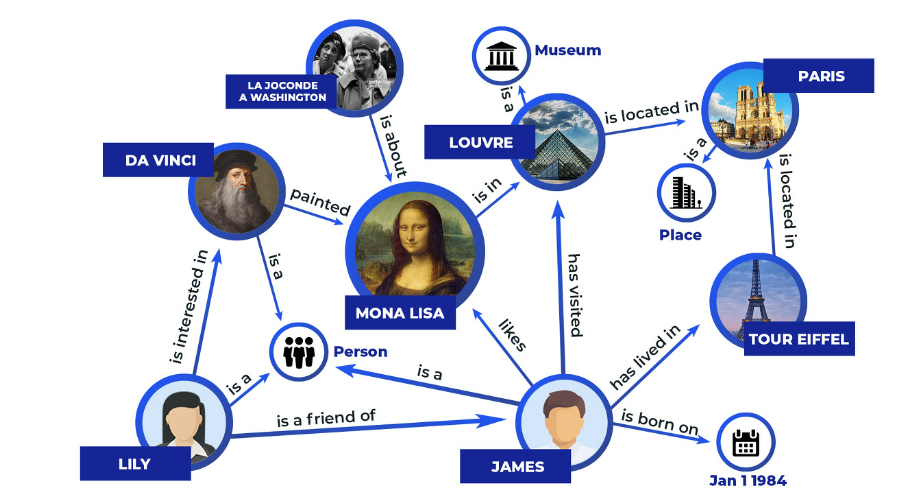

#### [지식 그래프 구성요소](https://www.samsungsds.com/kr/insights/techtoolkit_2021_knowledge_graph.html)
강력한 시각적 요소와 구조적 인사이트를 결합하여 복잡한 데이터 세트를 이해하고 분석하는 데 도움을 줍니다.

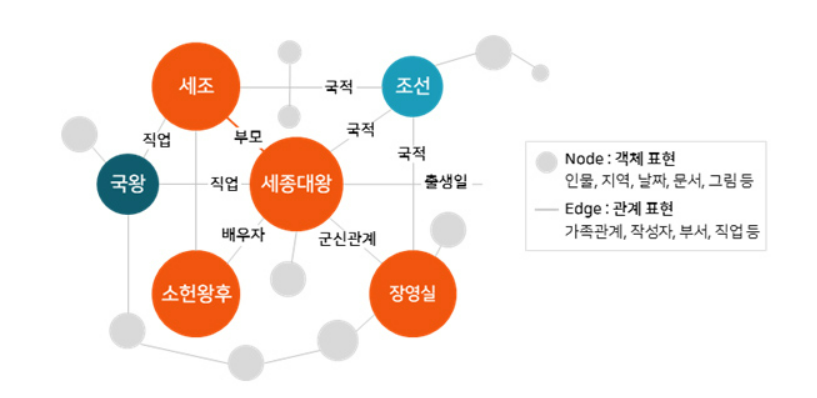

- `노드`
  - 지식 그래프의 첫 번째 핵심 구성 요소는 노드입니다. 노드는 개체나 항목을 나타내며, 이는 사람, 장소, 개념, 이벤트 등이 될 수 있습니다.
  - 각 노드는 고유한 식별자를 가지고 있어 지식 그래프에서 고유하게 식별할 수 있습니다.
  - 또한, 노드는 각각의 속성(예: 이름, 위치, 타입 등)을 가질 수 있습니다.
- `엣지`
  - 노드 간의 관계를 나타내는 두 번째 구성 요소는 엣지입니다.
  - 엣지는 노드와 노드 사이의 연결을 표현하며, 이 연결은 방향성을 가질 수 있습니다.
  - 예를 들어, "서울은 한국의 수도다"라는 관계를 나타내는 경우 '서울'과 '한국'은 노드가 되고, '수도다'는 엣지가 됩니다.
- `속성`
  - 속성은 노드가 가질 수 있는 정보의 세부 사항을 나타냅니다.
  - 예를 들어, 사람이라는 노드에 대한 속성으로는 이름, 나이, 직업 등이 있을 수 있습니다.
  - 엣지에도 속성을 부여할 수 있는데, 이 경우 해당 관계의 특성을 보다 자세하게 설명하는 데 사용됩니다
- `메타데이터`
  - 메타데이터는 지식 그래프의 구성 요소를 보다 정확하게 표현하고 설명하기 위한 추가 정보입니다.
  - 이는 노드와 엣지의 타입, 출처, 생성 날짜 등이 될 수 있습니다

### 예제

In [97]:
from langchain_openai import ChatOpenAI
from langchain.memory import ConversationKGMemory

In [98]:
llm = ChatOpenAI(temperature=0)

memory = ConversationKGMemory(llm=llm, return_messages=True)
memory.save_context(
    {"input": "이쪽은 Pangyo 에 거주중인 김셜리씨 입니다."},
    {"output": "김셜리씨는 누구시죠?"},
)
memory.save_context(
    {"input": "김셜리씨는 우리 회사의 신입 디자이너입니다."},
    {"output": "만나서 반갑습니다."},
)

In [99]:
memory.load_memory_variables({"input": "김셜리씨는 누구입니까?"})

{'history': [SystemMessage(content='On Pangyo: Pangyo has resident 김셜리씨.'),
  SystemMessage(content='On 김셜리씨: 김셜리씨 is 신입 디자이너. 김셜리씨 is in 우리 회사.')]}

#### with Chain
- `ConversationChain` 에 `ConversationKGMemory` 를 메모리로 지정하여 대화를 나눈 후 memory 를 확인해 보도록 하겠습니다.

In [100]:
from langchain.prompts.prompt import PromptTemplate
from langchain.chains import ConversationChain

llm = ChatOpenAI(temperature=0)

In [101]:
template = """The following is a friendly conversation between a human and an AI.
The AI is talkative and provides lots of specific details from its context.
If the AI does not know the answer to a question, it truthfully says it does not know.
The AI ONLY uses information contained in the "Relevant Information" section and does not hallucinate.

Relevant Information:

{history}

Conversation:
Human: {input}
AI:"""
prompt = PromptTemplate(
    input_variables=["history", "input"], template=template)

In [102]:
conversation_with_kg = ConversationChain(
    llm=llm, prompt=prompt, memory=ConversationKGMemory(llm=llm)
)

- 첫 번째 대화를 시작합니다. 간단한 인물에 대한 정보를 제공해 보겠습니다.

In [103]:
conversation_with_kg.predict(
    input="My name is Teddy. Shirley is a coworker of mine, and she's a new designer at our company."
)

"Hello Teddy! It's nice to meet you. Shirley must be excited to be starting a new job as a designer at your company. I hope she's settling in well and getting to know her new colleagues. If you need any tips on how to make her feel welcome or help her adjust to the new environment, feel free to ask!"

- Shirley 라는 사람에 대한 질문을 진행합니다.

In [104]:
# Shirley 에 대한 질문
conversation_with_kg.memory.load_memory_variables({"input": "who is Shirley?"})

{'history': 'On Shirley: Shirley is a coworker. Shirley is a new designer. Shirley is at our company.'}

## 대화 요약 메모리 - ConversationSummaryMemory
- `ConversationSummaryMemory` 를 사용하는 방법을 살펴 보겠습니다.
- 이 유형의 메모리는 시간 경과에 따른 `대화의 요약` 을 생성합니다. 이는 시간 경과에 따른 대화의 정보를 압축하는 데 유용할 수 있습니다.
- 대화 요약 메모리는 대화가 진행되는 동안 대화를 요약하고 `현재 요약을 메모리에 저장` 합니다.
- 그런 다음 이 메모리를 사용하여 지금까지의 대화 요약을 프롬프트/체인에 삽입할 수 있습니다.
- 이 메모리는 과거 메시지 기록을 프롬프트에 그대로 보관하면 토큰을 너무 많이 차지할 수 있는 긴 대화에 가장 유용합니다.

In [105]:
from langchain.memory import ConversationSummaryMemory
from langchain_openai import ChatOpenAI

memory = ConversationSummaryMemory(
    llm=ChatOpenAI(temperature=0), return_messages=True)

In [106]:
memory.save_context(
    inputs={"human": "유럽 여행 패키지의 가격은 얼마인가요?"},
    outputs={
        "ai": "유럽 14박 15일 패키지의 기본 가격은 3,500유로입니다. 이 가격에는 항공료, 호텔 숙박비, 지정된 관광지 입장료가 포함되어 있습니다. 추가 비용은 선택하신 옵션 투어나 개인 경비에 따라 달라집니다."
    },
)
memory.save_context(
    inputs={"human": "여행 중에 방문할 주요 관광지는 어디인가요?"},
    outputs={
        "ai": "이 여행에서는 파리의 에펠탑, 로마의 콜로세움, 베를린의 브란덴부르크 문, 취리히의 라이네폴 등 유럽의 유명한 관광지들을 방문합니다. 각 도시의 대표적인 명소들을 포괄적으로 경험하실 수 있습니다."
    },
)
memory.save_context(
    inputs={"human": "여행자 보험은 포함되어 있나요?"},
    outputs={
        "ai": "네, 모든 여행자에게 기본 여행자 보험을 제공합니다. 이 보험은 의료비 지원, 긴급 상황 발생 시 지원 등을 포함합니다. 추가적인 보험 보장을 원하시면 상향 조정이 가능합니다."
    },
)
memory.save_context(
    inputs={
        "human": "항공편 좌석을 비즈니스 클래스로 업그레이드할 수 있나요? 비용은 어떻게 되나요?"
    },
    outputs={
        "ai": "항공편 좌석을 비즈니스 클래스로 업그레이드하는 것이 가능합니다. 업그레이드 비용은 왕복 기준으로 약 1,200유로 추가됩니다. 비즈니스 클래스에서는 더 넓은 좌석, 우수한 기내식, 그리고 추가 수하물 허용량 등의 혜택을 제공합니다."
    },
)
memory.save_context(
    inputs={"human": "패키지에 포함된 호텔의 등급은 어떻게 되나요?"},
    outputs={
        "ai": "이 패키지에는 4성급 호텔 숙박이 포함되어 있습니다. 각 호텔은 편안함과 편의성을 제공하며, 중심지에 위치해 관광지와의 접근성이 좋습니다. 모든 호텔은 우수한 서비스와 편의 시설을 갖추고 있습니다."
    },
)
memory.save_context(
    inputs={"human": "식사 옵션에 대해 더 자세히 알려주실 수 있나요?"},
    outputs={
        "ai": "이 여행 패키지는 매일 아침 호텔에서 제공되는 조식을 포함하고 있습니다. 점심과 저녁 식사는 포함되어 있지 않아, 여행자가 자유롭게 현지의 다양한 음식을 경험할 수 있는 기회를 제공합니다. 또한, 각 도시별로 추천 식당 리스트를 제공하여 현지의 맛을 최대한 즐길 수 있도록 도와드립니다."
    },
)
memory.save_context(
    inputs={"human": "패키지 예약 시 예약금은 얼마인가요? 취소 정책은 어떻게 되나요?"},
    outputs={
        "ai": "패키지 예약 시 500유로의 예약금이 필요합니다. 취소 정책은 예약일로부터 30일 전까지는 전액 환불이 가능하며, 이후 취소 시에는 예약금이 환불되지 않습니다. 여행 시작일로부터 14일 전 취소 시 50%의 비용이 청구되며, 그 이후는 전액 비용이 청구됩니다."
    },
)

- 저장된 메모리의 history 를 확인합니다.
- 이전의 모든 대화를 압축적으로 요약한 내용을 확인할 수 있습니다.

In [107]:
# 저장된 메모리 확인
print(memory.load_memory_variables({})["history"])

[SystemMessage(content="The human asks about the price of a European travel package, which includes airfare, hotel accommodation, and specified entrance fees for 3,500 euros. The AI lists major tourist attractions and confirms that 4-star hotels are included in the package. Basic traveler's insurance is included, with the option to upgrade to business class for an additional 1,200 euros. The human inquires about meal options, and the AI explains that the package includes daily breakfast at the hotel, allowing travelers to explore local cuisine for lunch and dinner. Additionally, the AI provides recommended restaurant lists in each city to enhance the local dining experience. The human asks about the reservation deposit and cancellation policy. The AI explains that a 500 euro reservation deposit is required at booking, with a full refund available up to 30 days before the travel date. Cancellations made 14 days before the trip will incur a 50% charge, and cancellations within 14 days wi

### ConversationSummaryBufferMemory
- `ConversationSummaryBufferMemory` 는 두 가지 아이디어를 결합한 것입니다.
- 최근 대화내용의 버퍼를 메모리에 유지하되, 이전 대화내용을 완전히 플러시(flush)하지 않고 요약으로 컴파일하여 두 가지를 모두 사용합니다.
- 대화내용을 플러시할 시기를 결정하기 위해 상호작용의 개수가 아닌 토큰 길이 를 사용합니다.

In [108]:
from langchain_openai import ChatOpenAI
from langchain.memory import ConversationSummaryBufferMemory

llm = ChatOpenAI()

memory = ConversationSummaryBufferMemory(
    llm=llm,
    max_token_limit=200,  # 요약의 기준이 되는 토큰 길이를 설정합니다.
    return_messages=True,
)

In [109]:
memory.save_context(
    inputs={"human": "유럽 여행 패키지의 가격은 얼마인가요?"},
    outputs={
        "ai": "유럽 14박 15일 패키지의 기본 가격은 3,500유로입니다. 이 가격에는 항공료, 호텔 숙박비, 지정된 관광지 입장료가 포함되어 있습니다. 추가 비용은 선택하신 옵션 투어나 개인 경비에 따라 달라집니다."
    },
)

- 아직은 대화내용을 요약하지 않습니다. 기준이 되는 200 토큰에 도달하지 않았기 때문입니다.

In [110]:
# 메모리에 저장된 대화내용 확인
memory.load_memory_variables({})["history"]

[HumanMessage(content='유럽 여행 패키지의 가격은 얼마인가요?'),
 AIMessage(content='유럽 14박 15일 패키지의 기본 가격은 3,500유로입니다. 이 가격에는 항공료, 호텔 숙박비, 지정된 관광지 입장료가 포함되어 있습니다. 추가 비용은 선택하신 옵션 투어나 개인 경비에 따라 달라집니다.')]

In [111]:
memory.save_context(
    inputs={"human": "여행 중에 방문할 주요 관광지는 어디인가요?"},
    outputs={
        "ai": "이 여행에서는 파리의 에펠탑, 로마의 콜로세움, 베를린의 브란덴부르크 문, 취리히의 라이네폴 등 유럽의 유명한 관광지들을 방문합니다. 각 도시의 대표적인 명소들을 포괄적으로 경험하실 수 있습니다."
    },
)
memory.save_context(
    inputs={"human": "여행자 보험은 포함되어 있나요?"},
    outputs={
        "ai": "네, 모든 여행자에게 기본 여행자 보험을 제공합니다. 이 보험은 의료비 지원, 긴급 상황 발생 시 지원 등을 포함합니다. 추가적인 보험 보장을 원하시면 상향 조정이 가능합니다."
    },
)
memory.save_context(
    inputs={
        "human": "항공편 좌석을 비즈니스 클래스로 업그레이드할 수 있나요? 비용은 어떻게 되나요?"
    },
    outputs={
        "ai": "항공편 좌석을 비즈니스 클래스로 업그레이드하는 것이 가능합니다. 업그레이드 비용은 왕복 기준으로 약 1,200유로 추가됩니다. 비즈니스 클래스에서는 더 넓은 좌석, 우수한 기내식, 그리고 추가 수하물 허용량 등의 혜택을 제공합니다."
    },
)
memory.save_context(
    inputs={"human": "패키지에 포함된 호텔의 등급은 어떻게 되나요?"},
    outputs={
        "ai": "이 패키지에는 4성급 호텔 숙박이 포함되어 있습니다. 각 호텔은 편안함과 편의성을 제공하며, 중심지에 위치해 관광지와의 접근성이 좋습니다. 모든 호텔은 우수한 서비스와 편의 시설을 갖추고 있습니다."
    },
)

- 저장된 대화내용을 확인합니다. 가장 최근 1개의 대화에 대해서는 요약이 진행되지 않지만, 이전의 대화내용은 요약본으로 저장되어 있습니다.

In [112]:
# 메모리에 저장된 대화내용 확인
memory.load_memory_variables({})["history"]

[SystemMessage(content="The human asks how much a European travel package costs. The AI responds that the basic price for a 14-night, 15-day European package is 3,500 euros, which includes airfare, hotel accommodation, and specified entrance fees. Additional costs may vary depending on optional tours or personal expenses. When asked about the major tourist attractions to visit during the trip, the AI lists iconic landmarks such as the Eiffel Tower in Paris, the Colosseum in Rome, the Brandenburg Gate in Berlin, and the Rhine Falls in Zurich, offering a comprehensive experience of each city's highlights. The human inquires about whether traveler's insurance is included, and the AI confirms that basic traveler's insurance is provided for all travelers, which includes medical coverage and emergency assistance. Additional insurance coverage can be added if desired. The human then asks if it's possible to upgrade the flight seats to business class and inquires about the cost, to which the A

## 벡터저장소 검색 메모리 - VectorStoreRetrieverMemory
- `VectorStoreRetrieverMemory` 는 벡터 스토어에 메모리를 저장하고 호출될 때마다 가장 '눈에 띄는' 상위 K개의 문서를 쿼리합니다.
- 이는 대화내용의 순서를 명시적으로 추적하지 않는다는 점 에서 다른 대부분의 메모리 클래스와 다릅니다.

In [114]:
!pip install faiss-cpu # pip install faiss-gpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 49.0 MB/s eta 0:00:00


In [115]:
import faiss
from langchain_openai import OpenAIEmbeddings
from langchain.docstore import InMemoryDocstore
from langchain.vectorstores import FAISS


# 임베딩 모델을 정의합니다.
embeddings_model = OpenAIEmbeddings()

- `Vector Store` 를 초기화 합니다.

In [116]:
# Vector Store 를 초기화 합니다.
embedding_size = 1536
index = faiss.IndexFlatL2(embedding_size)
vectorstore = FAISS(embeddings_model, index, InMemoryDocstore({}), {})

- 실제 사용에서는 k를 더 높은 값으로 설정하지만, 여기서는 `k=1` 을 사용하여 다음과 같이 표시합니다.

In [117]:
from langchain.memory import VectorStoreRetrieverMemory

# 벡터 조회가 여전히 의미적으로 관련성 있는 정보를 반환한다는 것을 보여주기 위해서입니다.
retriever = vectorstore.as_retriever(search_kwargs={"k": 1})
memory = VectorStoreRetrieverMemory(retriever=retriever)

In [118]:
# 임의의 대화를 저장합니다.
memory.save_context(
    inputs={
        "human": "안녕하세요, 오늘 면접에 참석해주셔서 감사합니다. 자기소개 부탁드립니다."
    },
    outputs={
        "ai": "안녕하세요. 저는 컴퓨터 과학을 전공한 신입 개발자입니다. 대학에서는 주로 자바와 파이썬을 사용했으며, 최근에는 웹 개발 프로젝트에 참여하여 실제 사용자를 위한 서비스를 개발하는 경험을 했습니다."
    },
)
memory.save_context(
    inputs={"human": "프로젝트에서 어떤 역할을 맡았나요?"},
    outputs={
        "ai": "제가 맡은 역할은 백엔드 개발자였습니다. 사용자 데이터 처리와 서버 로직 개발을 담당했으며, RESTful API를 구현하여 프론트엔드와의 통신을 담당했습니다. 또한, 데이터베이스 설계에도 참여했습니다."
    },
)
memory.save_context(
    inputs={
        "human": "팀 프로젝트에서 어려움을 겪었던 경험이 있다면 어떻게 해결했나요?"
    },
    outputs={
        "ai": "프로젝트 초기에 의사소통 문제로 몇 가지 어려움이 있었습니다. 이를 해결하기 위해 저희 팀은 정기적인 미팅을 갖고 각자의 진행 상황을 공유했습니다. 또한, 문제가 발생했을 때는 적극적으로 의견을 나누고, 합리적인 해결책을 찾기 위해 노력했습니다."
    },
)
memory.save_context(
    inputs={"human": "개발자로서 자신의 강점은 무엇이라고 생각하나요?"},
    outputs={
        "ai": "제 강점은 빠른 학습 능력과 문제 해결 능력입니다. 새로운 기술이나 도구를 빠르게 습득할 수 있으며, 복잡한 문제에 직면했을 때 창의적인 해결책을 제시할 수 있습니다. 또한, 팀워크를 중시하며 동료들과 협력하는 것을 중요하게 생각합니다."
    },
)

- 다음의 질문을 했을 때 Vector Store 로 부터 1개(k=1 이기 때문)의 가장 관련성 높은 대화를 반환합니다.
  - 질문: "면접자 전공은 무엇인가요?"

In [119]:
# 메모리에 질문을 통해 가장 연관성 높은 1개 대화를 추출합니다.
print(memory.load_memory_variables({"prompt": "면접자 전공은 무엇인가요?"})["history"])

human: 안녕하세요, 오늘 면접에 참석해주셔서 감사합니다. 자기소개 부탁드립니다.
ai: 안녕하세요. 저는 컴퓨터 과학을 전공한 신입 개발자입니다. 대학에서는 주로 자바와 파이썬을 사용했으며, 최근에는 웹 개발 프로젝트에 참여하여 실제 사용자를 위한 서비스를 개발하는 경험을 했습니다.


- 이번에는 다른 질문을 통해 가장 연관성 높은 1개 대화를 추출합니다.
  - 질문: "면접자가 프로젝트에서 맡은 역할은 무엇인가요?"

In [120]:
print(
    memory.load_memory_variables(
        {"human": "면접자가 프로젝트에서 맡은 역할은 무엇인가요?"}
    )["history"]
)

human: 프로젝트에서 어떤 역할을 맡았나요?
ai: 제가 맡은 역할은 백엔드 개발자였습니다. 사용자 데이터 처리와 서버 로직 개발을 담당했으며, RESTful API를 구현하여 프론트엔드와의 통신을 담당했습니다. 또한, 데이터베이스 설계에도 참여했습니다.


# Chains

## 대화형 체인 - Conversation Chain
- `ChatOpenAI` 클래스를 사용하여 대화형 AI 모델의 인스턴스를 생성하고, 이를 통해 사용자와의 대화를 처리할 수 있습니다.
- `ConversationChain`, `ChatOpenAI`, `ConversationBufferMemory` 모듈은 대화 관리 및 메모리 관리에 필요한 기능을 제공합니다.

In [121]:
from langchain.chains import ConversationChain
from langchain_openai import ChatOpenAI
from langchain.memory import ConversationBufferMemory

- `ConversationChain` 클래스의 인스턴스를 생성하여 대화 관리를 수행합니다.
- 이때, `llm`은 저수준 언어 모델을, `verbose`는 상세한 로깅 여부를 (여기서는 비활성화), 그리고 `memory`는 대화 내용을 저장할 메모리 버퍼를 각각 지정합니다.

In [122]:
# ChatOpenAI 객체를 생성합니다.
llm = ChatOpenAI(model="gpt-4-turbo-preview")

# ConversationChain 인스턴스를 생성합니다.
# llm: 모델을 지정합니다.
# verbose: 상세한 로깅을 비활성화합니다.
# memory: 대화 내용을 저장하는 메모리 버퍼를 지정합니다.
conversation = ConversationChain(
    llm=llm,
    verbose=False,
    memory=ConversationBufferMemory(memory_key="history"),
)

- 이 함수는 문자열 입력을 받아 대화 모델을 통해 예측 결과를 반환합니다.
- `conversation.predict` 함수는 주어진 입력에 대한 모델의 반응을 예측하는 데 사용됩니다.

In [123]:
conversation.invoke({"input": "양자역학에 대해 설명해줘."})

{'input': '양자역학에 대해 설명해줘.',
 'history': '',
 'response': "양자역학은 물리학의 한 분야로, 원자와 원자를 구성하는 입자들의 행동을 설명합니다. 우리가 일상에서 경험하는 고전역학의 법칙들은 이러한 아주 작은 입자들에게는 적용되지 않아요. 양자역학은 20세기 초에 개발되기 시작했으멀로 상대적으로 새로운 이론입니다.\n\n양자역학의 가장 중요한 개념 중 하나는 '불확정성 원리'입니다. 하이젠베르크에 의해 처음 제안된 이 원칙은 어떤 입자의 위치와 운동량을 동시에 정확하게 알 수 없다고 말합니다. 이는 입자가 특정한 시간에 정확한 위치와 속도를 동시에 가지고 있지 않다는 의미이기도 합니다.\n\n또 다른 중요한 개념은 '양자 중첩'인데, 이는 입자가 여러 상태의 중첩된 상태에 있을 수 있다는 것을 의미합니다. 예를 들어, 양자역학적 시스템은 여러 가능한 결과를 동시에 가질 수 있으며, 관측이 이루어지기 전까지는 특정한 상태에 있지 않습니다. 이 현상은 슈뢰딩거의 고양이 실험으로 유명하게 설명됩니다.\n\n양자 얽힘도 매우 흥미로운 현상입니다. 두 입자가 얽혀 있을 때, 한 입자의 상태를 측정하면 즉시 다른 입자의 상태도 결정됩니다. 이는 입자들이 얼마나 멀리 떨어져 있든 상관없이 발생하며, 이를 통해 정보가 빛보다 빠르게 전달되는 것처럼 보이게 합니다. 하지만 이것이 상대성 이론을 위반하지는 않습니다.\n\n이러한 개념들은 양자역학을 매우 비직관적으로 만들지만, 실험을 통해 반복적으로 증명되었습니다. 양자역학은 현대 과학과 기술에 광범위하게 적용되며, 양자 컴퓨팅, 양자 암호화, MRI 기계 등 다양한 분야에서 중요한 역할을 합니다."}

In [124]:
conversation.memory.load_memory_variables({})["history"]

"Human: 양자역학에 대해 설명해줘.\nAI: 양자역학은 물리학의 한 분야로, 원자와 원자를 구성하는 입자들의 행동을 설명합니다. 우리가 일상에서 경험하는 고전역학의 법칙들은 이러한 아주 작은 입자들에게는 적용되지 않아요. 양자역학은 20세기 초에 개발되기 시작했으멀로 상대적으로 새로운 이론입니다.\n\n양자역학의 가장 중요한 개념 중 하나는 '불확정성 원리'입니다. 하이젠베르크에 의해 처음 제안된 이 원칙은 어떤 입자의 위치와 운동량을 동시에 정확하게 알 수 없다고 말합니다. 이는 입자가 특정한 시간에 정확한 위치와 속도를 동시에 가지고 있지 않다는 의미이기도 합니다.\n\n또 다른 중요한 개념은 '양자 중첩'인데, 이는 입자가 여러 상태의 중첩된 상태에 있을 수 있다는 것을 의미합니다. 예를 들어, 양자역학적 시스템은 여러 가능한 결과를 동시에 가질 수 있으며, 관측이 이루어지기 전까지는 특정한 상태에 있지 않습니다. 이 현상은 슈뢰딩거의 고양이 실험으로 유명하게 설명됩니다.\n\n양자 얽힘도 매우 흥미로운 현상입니다. 두 입자가 얽혀 있을 때, 한 입자의 상태를 측정하면 즉시 다른 입자의 상태도 결정됩니다. 이는 입자들이 얼마나 멀리 떨어져 있든 상관없이 발생하며, 이를 통해 정보가 빛보다 빠르게 전달되는 것처럼 보이게 합니다. 하지만 이것이 상대성 이론을 위반하지는 않습니다.\n\n이러한 개념들은 양자역학을 매우 비직관적으로 만들지만, 실험을 통해 반복적으로 증명되었습니다. 양자역학은 현대 과학과 기술에 광범위하게 적용되며, 양자 컴퓨팅, 양자 암호화, MRI 기계 등 다양한 분야에서 중요한 역할을 합니다."

In [125]:
print(conversation.invoke({"input": "불렛포인트 형식으로 작성해줘. emoji 추가해줘."}))

{'input': '불렛포인트 형식으로 작성해줘. emoji 추가해줘.', 'history': "Human: 양자역학에 대해 설명해줘.\nAI: 양자역학은 물리학의 한 분야로, 원자와 원자를 구성하는 입자들의 행동을 설명합니다. 우리가 일상에서 경험하는 고전역학의 법칙들은 이러한 아주 작은 입자들에게는 적용되지 않아요. 양자역학은 20세기 초에 개발되기 시작했으멀로 상대적으로 새로운 이론입니다.\n\n양자역학의 가장 중요한 개념 중 하나는 '불확정성 원리'입니다. 하이젠베르크에 의해 처음 제안된 이 원칙은 어떤 입자의 위치와 운동량을 동시에 정확하게 알 수 없다고 말합니다. 이는 입자가 특정한 시간에 정확한 위치와 속도를 동시에 가지고 있지 않다는 의미이기도 합니다.\n\n또 다른 중요한 개념은 '양자 중첩'인데, 이는 입자가 여러 상태의 중첩된 상태에 있을 수 있다는 것을 의미합니다. 예를 들어, 양자역학적 시스템은 여러 가능한 결과를 동시에 가질 수 있으며, 관측이 이루어지기 전까지는 특정한 상태에 있지 않습니다. 이 현상은 슈뢰딩거의 고양이 실험으로 유명하게 설명됩니다.\n\n양자 얽힘도 매우 흥미로운 현상입니다. 두 입자가 얽혀 있을 때, 한 입자의 상태를 측정하면 즉시 다른 입자의 상태도 결정됩니다. 이는 입자들이 얼마나 멀리 떨어져 있든 상관없이 발생하며, 이를 통해 정보가 빛보다 빠르게 전달되는 것처럼 보이게 합니다. 하지만 이것이 상대성 이론을 위반하지는 않습니다.\n\n이러한 개념들은 양자역학을 매우 비직관적으로 만들지만, 실험을 통해 반복적으로 증명되었습니다. 양자역학은 현대 과학과 기술에 광범위하게 적용되며, 양자 컴퓨팅, 양자 암호화, MRI 기계 등 다양한 분야에서 중요한 역할을 합니다.", 'response': '물론이죠! 양자역학에 대해서 불렛포인트와 이모지로 간단하게 정리해 드릴게요. 😊\n\n- **양자역학의 정의** 📚\n  - 원자와 원자를 구성하는 입자들의 행동을 설명하는 물리학의 분야입니다.\n  - 고전역학의 법칙들은 아

In [126]:
conversation.memory.load_memory_variables({})["history"]

"Human: 양자역학에 대해 설명해줘.\nAI: 양자역학은 물리학의 한 분야로, 원자와 원자를 구성하는 입자들의 행동을 설명합니다. 우리가 일상에서 경험하는 고전역학의 법칙들은 이러한 아주 작은 입자들에게는 적용되지 않아요. 양자역학은 20세기 초에 개발되기 시작했으멀로 상대적으로 새로운 이론입니다.\n\n양자역학의 가장 중요한 개념 중 하나는 '불확정성 원리'입니다. 하이젠베르크에 의해 처음 제안된 이 원칙은 어떤 입자의 위치와 운동량을 동시에 정확하게 알 수 없다고 말합니다. 이는 입자가 특정한 시간에 정확한 위치와 속도를 동시에 가지고 있지 않다는 의미이기도 합니다.\n\n또 다른 중요한 개념은 '양자 중첩'인데, 이는 입자가 여러 상태의 중첩된 상태에 있을 수 있다는 것을 의미합니다. 예를 들어, 양자역학적 시스템은 여러 가능한 결과를 동시에 가질 수 있으며, 관측이 이루어지기 전까지는 특정한 상태에 있지 않습니다. 이 현상은 슈뢰딩거의 고양이 실험으로 유명하게 설명됩니다.\n\n양자 얽힘도 매우 흥미로운 현상입니다. 두 입자가 얽혀 있을 때, 한 입자의 상태를 측정하면 즉시 다른 입자의 상태도 결정됩니다. 이는 입자들이 얼마나 멀리 떨어져 있든 상관없이 발생하며, 이를 통해 정보가 빛보다 빠르게 전달되는 것처럼 보이게 합니다. 하지만 이것이 상대성 이론을 위반하지는 않습니다.\n\n이러한 개념들은 양자역학을 매우 비직관적으로 만들지만, 실험을 통해 반복적으로 증명되었습니다. 양자역학은 현대 과학과 기술에 광범위하게 적용되며, 양자 컴퓨팅, 양자 암호화, MRI 기계 등 다양한 분야에서 중요한 역할을 합니다.\nHuman: 불렛포인트 형식으로 작성해줘. emoji 추가해줘.\nAI: 물론이죠! 양자역학에 대해서 불렛포인트와 이모지로 간단하게 정리해 드릴게요. 😊\n\n- **양자역학의 정의** 📚\n  - 원자와 원자를 구성하는 입자들의 행동을 설명하는 물리학의 분야입니다.\n  - 고전역학의 법칙들은 아주 작은 입자들에게는 적용되지 않습니다.\n\n

### [streaming](https://python.langchain.com/v0.1/docs/modules/callbacks/custom_callbacks/)
- 스트리밍 방식으로 대화형 AI 모델을 구현합니다.
- `MyCustomHandler` 클래스는 `BaseCallbackHandler`를 상속받아, 새로운 토큰이 생성될 때마다 이를 출력하는 기능을 정의합니다.
- `ChatOpenAI` 의 스트리밍 모드를 활성화하고, 사용자 정의 핸들러인 `StreamingHandler` 인스턴스를 콜백으로 설정합니다.

In [127]:
from langchain_core.callbacks.base import BaseCallbackHandler
from langchain_openai import ChatOpenAI


class StreamingHandler(BaseCallbackHandler):
    def on_llm_new_token(self, token: str, **kwargs) -> None:
        print(f"{token}", end="", flush=True)


# 스트리밍을 활성화하기 위해, ChatModel 생성자에 `streaming=True`를 전달합니다.
# 추가적으로, 사용자 정의 핸들러 리스트를 전달합니다.
stream_llm = ChatOpenAI(
    model="gpt-4-turbo-preview", streaming=True, callbacks=[StreamingHandler()]
)

conversation = ConversationChain(
    llm=stream_llm,
    verbose=False,
    memory=ConversationBufferMemory(),
)

- `conversation.predict` 메소드는 주어진 입력에 대한 예측 결과를 반환합니다.
- 이 예시에서는 '양자역학에 대해 설명해줘'라는 문자열을 입력으로 사용하며, 해당 입력에 대한 예측 결과를 `output` 변수에 저장합니다.
- 이 과정은 AI 기반 대화 시스템에서 특정 주제에 대한 설명을 요청하는 방법을 보여줍니다.

In [128]:
conversation.predict(input="양자역학에 대해 설명해줘")

양자역학은 물리학의 한 분야로, 아주 작은 입자들의 세계, 즉 원자와 원자의 구성 요소들인 전자, 광자, 쿼크와 같은 기본 입자들의 행동과 상호작용을 설명하는 이론입니다. 20세기 초에 발전하기 시작한 이 이론은 고전 물리학의 법칙들이 이러한 미시 세계에서는 적용되지 않는다는 것을 발견하면서 등장했습니다. 양자역학은 불확정성 원리, 파동-입자 이중성, 양자 중첩과 같은 혁신적인 개념을 도입하며 우리가 자연 세계를 이해하는 방식을 근본적으로 변화시켰습니다.

불확정성 원리는 하이젠베르크에 의해 제안되었으며, 입자의 정확한 위치와 운동량을 동시에 알 수 없다는 것을 의미합니다. 이는 관측이 입자의 상태에 영향을 준다는 양자역학의 기본적인 특성 때문입니다.

파동-입자 이중성은 빛과 물질이 모두 파동과 입자의 성질을 동시에 가질 수 있다는 개념입니다. 예를 들어, 전자는 통상 입자로 간주되지만, 파동의 성질을 나타내는 실험 결과도 있습니다. 이로 인해, 물질을 단순히 입자나 파동으로만 분류할 수 없게 되었습니다.

양자 중첩은 양자 시스템이 여러 가능한 상태들의 '중첩' 상태에 있을 수 있다는 원리입니다. 즉, 입자가 여러 위치에 동시에 존재할 수 있는 것처럼 행동할 수 있으며, 이는 양자 컴퓨팅의 기본 원리 중 하나로 활용됩니다.

양자역학의 이론은 아인슈타인의 상대성 이론과 함께 현대 물리학의 두 대가로 여겨지며, 양자역학은 화학, 재료 과학, 통신, 컴퓨터 과학 등 다양한 분야에 광범위하게 응용되고 있습니다. 예를 들어, 반도체 기술, 레이저, MRI 스캐너 등 우리 일상 속 여러 기술들이 양자역학의 원리를 기반으로 합니다.

"양자역학은 물리학의 한 분야로, 아주 작은 입자들의 세계, 즉 원자와 원자의 구성 요소들인 전자, 광자, 쿼크와 같은 기본 입자들의 행동과 상호작용을 설명하는 이론입니다. 20세기 초에 발전하기 시작한 이 이론은 고전 물리학의 법칙들이 이러한 미시 세계에서는 적용되지 않는다는 것을 발견하면서 등장했습니다. 양자역학은 불확정성 원리, 파동-입자 이중성, 양자 중첩과 같은 혁신적인 개념을 도입하며 우리가 자연 세계를 이해하는 방식을 근본적으로 변화시켰습니다.\n\n불확정성 원리는 하이젠베르크에 의해 제안되었으며, 입자의 정확한 위치와 운동량을 동시에 알 수 없다는 것을 의미합니다. 이는 관측이 입자의 상태에 영향을 준다는 양자역학의 기본적인 특성 때문입니다.\n\n파동-입자 이중성은 빛과 물질이 모두 파동과 입자의 성질을 동시에 가질 수 있다는 개념입니다. 예를 들어, 전자는 통상 입자로 간주되지만, 파동의 성질을 나타내는 실험 결과도 있습니다. 이로 인해, 물질을 단순히 입자나 파동으로만 분류할 수 없게 되었습니다.\n\n양자 중첩은 양자 시스템이 여러 가능한 상태들의 '중첩' 상태에 있을 수 있다는 원리입니다. 즉, 입자가 여러 위치에 동시에 존재할 수 있는 것처럼 행동할 수 있으며, 이는 양자 컴퓨팅의 기본 원리 중 하나로 활용됩니다.\n\n양자역학의 이론은 아인슈타인의 상대성 이론과 함께 현대 물리학의 두 대가로 여겨지며, 양자역학은 화학, 재료 과학, 통신, 컴퓨터 과학 등 다양한 분야에 광범위하게 응용되고 있습니다. 예를 들어, 반도체 기술, 레이저, MRI 스캐너 등 우리 일상 속 여러 기술들이 양자역학의 원리를 기반으로 합니다."

In [129]:
conversation.predict(
    input="이전의 내용을 불렛포인트로 요약해줘. emoji 추가해줘."
)

- 양자역학은 아주 작은 입자들의 세계를 설명하는 물리학의 한 분야입니다. 🔬
- 20세기 초에 발전하며 고전 물리학이 적용되지 않는 미시 세계를 탐구합니다. 🕰️
- 불확정성 원리: 하이젠베르크에 의해 제안, 입자의 정확한 위치와 운동량을 동시에 알 수 없음을 의미합니다. 📍↔️💨
- 파동-입자 이중성: 빛과 물질이 파동과 입자의 성질을 모두 가질 수 있음을 나타냅니다. 🌊+🔴
- 양자 중첩: 입자가 여러 가능한 상태들의 '중첩' 상태에 있을 수 있음을 의미합니다. 🔄
- 양자역학은 화학, 재료 과학, 통신, 컴퓨터 과학 등 다양한 분야에 응용됩니다. 🧪💻📡
- 핵심 기술 예: 반도체 기술, 레이저, MRI 스캐너 등. 🖥️🔦🏥

"- 양자역학은 아주 작은 입자들의 세계를 설명하는 물리학의 한 분야입니다. 🔬\n- 20세기 초에 발전하며 고전 물리학이 적용되지 않는 미시 세계를 탐구합니다. 🕰️\n- 불확정성 원리: 하이젠베르크에 의해 제안, 입자의 정확한 위치와 운동량을 동시에 알 수 없음을 의미합니다. 📍↔️💨\n- 파동-입자 이중성: 빛과 물질이 파동과 입자의 성질을 모두 가질 수 있음을 나타냅니다. 🌊+🔴\n- 양자 중첩: 입자가 여러 가능한 상태들의 '중첩' 상태에 있을 수 있음을 의미합니다. 🔄\n- 양자역학은 화학, 재료 과학, 통신, 컴퓨터 과학 등 다양한 분야에 응용됩니다. 🧪💻📡\n- 핵심 기술 예: 반도체 기술, 레이저, MRI 스캐너 등. 🖥️🔦🏥"

### Prompt 튜닝
- 이 코드는 `langchain.prompts`에서 `PromptTemplate` 클래스를 가져와 사용합니다.
- `PromptTemplate`는 템플릿 기반의 프롬프트를 생성하는 데 사용되며, 여기서는 엑셀 전문가와의 대화를 시뮬레이션하는 템플릿을 정의합니다.
- 템플릿에는 `대화 내용(context)`과 `사용자의 질문(question)`이 포함되어 있으며, 이 두 변수는 `PromptTemplate` 생성자에 `input_variables`로 전달됩니다.
- 이를 통해, 주어진 대화 내용과 질문에 기반한 엑셀 전문가의 답변을 생성하는 프롬프트가 만들어집니다.

In [130]:
from langchain.prompts import PromptTemplate

template = """
당신은 10년차 엑셀 전문가 입니다. 아래 대화내용을 보고 질문에 대한 적절한 답변을 해주세요

#대화내용
{chat_history}
----
사용자: {question}
엑셀전문가:"""

prompt = PromptTemplate.from_template(template)

In [131]:
prompt.partial(chat_history="엑셀에서 데이터를 필터링하는 방법에 대해 알려주세요.")

PromptTemplate(input_variables=['question'], partial_variables={'chat_history': '엑셀에서 데이터를 필터링하는 방법에 대해 알려주세요.'}, template='\n당신은 10년차 엑셀 전문가 입니다. 아래 대화내용을 보고 질문에 대한 적절한 답변을 해주세요\n\n#대화내용\n{chat_history}\n----\n사용자: {question}\n엑셀전문가:')

- 이 함수는 `ConversationChain` 클래스의 인스턴스를 생성합니다.
- 여기서 `llm`은 언어 모델을, `prompt`는 대화의 시작점을, `memory`는 대화의 맥락을 저장하는 메모리 버퍼를, `input_key`는 사용자 입력을 받는 키를, 그리고 `verbose`는 상세한 로깅을 활성화할지 여부를 지정합니다.
- 특히, `memory`는 `ConversationBufferMemory` 클래스를 사용하여 `memory_key`를 통해 어떤 정보를 기억할지 결정합니다.

In [132]:
conversation = ConversationChain(
    llm=stream_llm,
    prompt=prompt,
    memory=ConversationBufferMemory(memory_key="chat_history"),
    input_key="question",
)

- 이 함수는 `conversation.predict`를 호출하여, 사용자가 제공한 질문에 대한 예측된 답변을 반환합니다.
- 여기서, `question` 매개변수는 질문의 내용을 문자열로 받습니다.
- 예시에서는 "엑셀에서 VLOOKUP 함수는 무엇인가요? 간단하게 설명해주세요"라는 질문을 처리하고 있습니다.

In [133]:
answer = conversation.predict(
    question="엑셀에서 VLOOKUP 함수는 무엇인가요? 간단하게 설명해주세요"
)

VLOOKUP 함수는 엑셀에서 사용하는 수식 중 하나로, 'Vertical Lookup'의 약자입니다. 이 함수는 특정 테이블의 컬럼에서 지정한 값과 일치하는 첫 번째 항목을 수직으로 검색하여, 그 결과에 해당하는 다른 컬럼의 값을 반환합니다. 사용자가 찾고자 하는 값, 검색 범위, 반환할 값이 위치한 열 번호, 그리고 정확한 일치 여부를 나타내는 [range_lookup] 인자로 구성됩니다. 이를 통해 다양한 데이터에서 원하는 정보를 효율적으로 찾아낼 수 있습니다.

- `conversation.predict` 함수는 주어진 질문에 대한 예측을 수행합니다.
- 이 함수는 `question` 매개변수를 통해 질문을 입력받으며, 이 예제에서는 "예제를 보여주세요"라는 질문에 대한 예측 결과를 반환합니다.

In [134]:
answer = conversation.predict(question="예제를 보여주세요")

예를 들어, 우리가 가지고 있는 데이터 테이블에서 직원의 ID를 통해 그들의 이름을 찾고 싶다고 가정해봅시다. 이 데이터 테이블에는 A열에 직원 ID가 있고, B열에는 직원의 이름이 있습니다.

```
A      B
1  ID    이름
2  101  홍길동
3  102  이순신
4  103  강감찬
```

여기서 ID '102'에 해당하는 직원의 이름을 찾고 싶다면, 다음과 같이 VLOOKUP 함수를 사용할 수 있습니다.

```excel
=VLOOKUP(102, A1:B4, 2, FALSE)
```

이 수식의 각 부분은 다음과 같은 의미를 가집니다:
- `102`는 찾고자 하는 값입니다. 즉, 우리가 찾고 싶은 직원의 ID입니다.
- `A1:B4`는 검색 범위로, ID와 이름이 포함된 테이블의 범위입니다.
- `2`는 반환하고 싶은 값이 위치한 열 번호입니다. 이 경우, 이름이 B열에 위치하기 때문에 '2'를 사용합니다.
- `FALSE`는 정확한 일치를 나타냅니다. 즉, '102'와 정확히 일치하는 ID만을 찾습니다.

이 수식을 실행하면, "이순신"이라는 결과가 반환됩니다. 이처럼 VLOOKUP 함수를 사용하여 특정 조건에 맞는 데이터를 테이블에서 쉽게 찾아낼 수 있습니다.

### Human Prefix & AI Prefix 변경
- 기본적으로 이 접두사는 "사람"으로 설정되어 있지만 원하는 대로 변경할 수 있습니다.
- 이 접두사를 변경하는 경우 체인에서 사용되는 프롬프트도 이 이름 변경을 반영하도록 변경해야 한다는 점에 유의하세요.
- 이 함수는 사용자로부터 엑셀 관련 `질문(question)`과 그 질문의 `맥락(context)`을 입력받아, 10년차 엑셀 전문가로서의 답변을 준비하는 템플릿을 생성합니다.
- `PromptTemplate` 클래스는 `입력 변수(input_variables)`와 `템플릿(template)`을 인자로 받아 인스턴스를 생성합니다. 이 인스턴스는 엑셀 관련 질문에 대한 답변을 생성하는 데 사용될 수 있습니다.

In [135]:
template = """
당신은 10년차 엑셀 전문가 입니다. 아래 대화내용을 보고 질문에 대한 적절한 답변을 해주세요

#대화내용
{context}
----
🌱고객: {question}
🤖전문가:"""

prompt = PromptTemplate.from_template(template)

- `ConversationBufferMemory` 클래스는 대화의 맥락을 관리하는 데 사용됩니다.
- 이 클래스의 인스턴스를 생성할 때, `memory_key`는 대화의 맥락을 저장하는 키로 사용되며, `human_prefix`와 `ai_prefix`는 각각 사람과 AI가 말하는 부분에 붙는 접두사로 설정됩니다.
- 이를 통해 대화 내용을 더 명확하게 구분할 수 있습니다.

In [136]:
memory = ConversationBufferMemory(
    memory_key="context",  # 대화의 맥락을 저장하는 키
    human_prefix="🌱고객",  # 사람이 말하는 부분에 붙는 접두사
    ai_prefix="🤖전문가",  # AI가 말하는 부분에 붙는 접두사
)

- 이 함수는 `ConversationChain` 클래스의 인스턴스를 생성합니다.
- 여기서 `llm`은 언어 모델을, `prompt`는 사용자 입력을, `memory`는 대화의 이전 상태를 저장하는 데 사용됩니다.
- `input_key`는 입력 데이터의 키를 지정하며, `verbose`는 로깅의 상세도를 조절합니다.
- 이 구성을 통해 대화형 AI 시스템에서의 연속적인 대화 관리가 가능해집니다.

In [137]:
conversation = ConversationChain(
    llm=stream_llm,
    prompt=prompt,
    memory=memory,
    input_key="question",
    verbose=False,
)

- 이 함수는 `conversation.predict`을 사용하여 특정 질문에 대한 대화형 응답을 실행합니다.

In [138]:
answer = conversation.predict(
    question="엑셀에서 VLOOKUP 함수는 무엇인가요? 간단하게 설명해주세요"
)

VLOOKUP 함수는 엑셀에서 수직으로 데이터를 검색하여 일치하는 정보를 찾아주는 함수입니다. 특정 키값을 기준으로 한 컬럼에서 값을 찾고, 해당 행에서 지정한 컬럼의 데이터를 반환합니다. 예를 들어, 사원 목록에서 사원번호로 사원의 이름을 찾는 경우에 사용할 수 있습니다. 함수의 기본 구조는 `VLOOKUP(찾을 값, 범위, 열 번호, 근사/정확치 여부)`로 구성됩니다.

In [139]:
answer = conversation.predict(question="쉬운 예제를 보여줄 수 있나요?")

물론입니다. 예를 들어, 아래와 같은 사원 목록이 있다고 가정해 봅시다.

| A       | B        |
|---------|----------|
| 사원번호 | 사원이름   |
| 001     | 김철수    |
| 002     | 이영희    |
| 003     | 박지민    |

이 목록에서 사원번호를 기준으로 사원의 이름을 찾고자 할 때 VLOOKUP 함수를 사용할 수 있습니다. 예를 들어, 사원번호 '002'에 해당하는 사원의 이름을 찾고자 한다면 다음과 같이 함수를 작성할 수 있습니다.

`=VLOOKUP("002", A:B, 2, FALSE)`

이 함수는 다음 단계로 작동합니다:
1. `"002"`: 찾고자 하는 키 값입니다.
2. `A:B`: 검색을 수행할 범위입니다. 이 경우 A열의 사원번호를 검색하여 일치하는 행을 찾습니다.
3. `2`: 찾은 행에서 반환할 값이 있는 열의 번호입니다. 이 경우 B열에 해당하는 사원이름을 반환하도록 지정합니다.
4. `FALSE`: 정확하게 일치하는 값을 찾습니다. `TRUE`를 사용하면 근사치 검색을 수행합니다.

결과적으로, 이 함수는 '이영희'라는 값을 반환할 것입니다. 이것은 사원번호 '002'에 해당하는 사원의 이름이기 때문입니다.

- `memory.load_memory_variables`를 호출하여 메모리에 저장된 변수들을 로드합니다.(전체 대화내용 출력)
- 호출 시, `빈 딕셔너리 {}`를 인자로 전달하며, 결과적으로 `'context' 키`에 해당하는 값을 출력합니다.
- 이 과정은 특정 메모리 상태를 확인하거나 디버깅할 때 유용하게 사용될 수 있습니다.

In [140]:
print(
    memory.load_memory_variables({})["context"]
)  # 빈 딕셔너리를 인자로 받아 메모리 변수를 로드하고, 'context' 키에 해당하는 값을 출력합니다.

🌱고객: 엑셀에서 VLOOKUP 함수는 무엇인가요? 간단하게 설명해주세요
🤖전문가: VLOOKUP 함수는 엑셀에서 수직으로 데이터를 검색하여 일치하는 정보를 찾아주는 함수입니다. 특정 키값을 기준으로 한 컬럼에서 값을 찾고, 해당 행에서 지정한 컬럼의 데이터를 반환합니다. 예를 들어, 사원 목록에서 사원번호로 사원의 이름을 찾는 경우에 사용할 수 있습니다. 함수의 기본 구조는 `VLOOKUP(찾을 값, 범위, 열 번호, 근사/정확치 여부)`로 구성됩니다.
🌱고객: 쉬운 예제를 보여줄 수 있나요?
🤖전문가: 물론입니다. 예를 들어, 아래와 같은 사원 목록이 있다고 가정해 봅시다.

| A       | B        |
|---------|----------|
| 사원번호 | 사원이름   |
| 001     | 김철수    |
| 002     | 이영희    |
| 003     | 박지민    |

이 목록에서 사원번호를 기준으로 사원의 이름을 찾고자 할 때 VLOOKUP 함수를 사용할 수 있습니다. 예를 들어, 사원번호 '002'에 해당하는 사원의 이름을 찾고자 한다면 다음과 같이 함수를 작성할 수 있습니다.

`=VLOOKUP("002", A:B, 2, FALSE)`

이 함수는 다음 단계로 작동합니다:
1. `"002"`: 찾고자 하는 키 값입니다.
2. `A:B`: 검색을 수행할 범위입니다. 이 경우 A열의 사원번호를 검색하여 일치하는 행을 찾습니다.
3. `2`: 찾은 행에서 반환할 값이 있는 열의 번호입니다. 이 경우 B열에 해당하는 사원이름을 반환하도록 지정합니다.
4. `FALSE`: 정확하게 일치하는 값을 찾습니다. `TRUE`를 사용하면 근사치 검색을 수행합니다.

결과적으로, 이 함수는 '이영희'라는 값을 반환할 것입니다. 이것은 사원번호 '002'에 해당하는 사원의 이름이기 때문입니다.


## 구조화된 출력 체인 - Structured Output Chain
- 특정 주제에 대한 4지선다형 퀴즈를 생성하는 과정을 구현합니다.
- `Quiz` 클래스는 퀴즈의 질문, 난이도, 그리고 네 개의 선택지를 정의합니다.
- `ChatOpenAI` 인스턴스는 GPT-4 모델을 사용하여 자연어 처리를 수행하고, `ChatPromptTemplate`는 퀴즈 생성을 위한 대화형 프롬프트를 정의합니다.
- 마지막으로, `create_structured_output_runnable` 함수는 이러한 구성 요소를 결합하여 주어진 주제("ADSP(데이터 분석 준전문가) 자격 시험")에 대한 퀴즈를 생성하는 실행 가능한 체인을 만듭니다.

In [141]:
from langchain.chains.openai_functions import create_structured_output_runnable
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.pydantic_v1 import BaseModel, Field
from typing import List

In [142]:
class Quiz(BaseModel):
    """4지선다형 퀴즈의 정보를 추출합니다"""

    question: str = Field(..., description="퀴즈의 질문")
    level: str = Field(
        ..., description="퀴즈의 난이도를 나타냅니다. (쉬움, 보통, 어려움)"
    )
    options: List[str] = Field(..., description="퀴즈의 4개의 선택지 입니다.")

In [143]:
llm = ChatOpenAI(model="gpt-4-turbo-preview", temperature=0.1)

In [144]:
prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You're a world-famous quizzer and generates quizzes in structured formats.",
        ),
        (
            "human",
            "TOPIC 에 제시된 내용과 관련한 4지선다형 퀴즈를 출제해 주세요. 만약, 실제 출제된 기출문제가 있다면 비슷한 문제를 만들어 출제하세요."
            "단, 문제에 TOPIC 에 대한 내용이나 정보는 포함하지 마세요. \nTOPIC:\n{topic}",
        ),
        ("human", "Tip: Make sure to answer in the correct format"),
    ]
)

In [145]:
chain = create_structured_output_runnable(Quiz, llm, prompt)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: LangChain has introduced a method called `with_structured_output` that is available on ChatModels capable of tool calling. You can read more about the method here: https://python.langchain.com/docs/modules/model_io/chat/structured_output/ Please follow our extraction use case documentation for more guidelines on how to do information extraction with LLMs. https://python.langchain.com/docs/use_cases/extraction/. If you notice other issues, please provide feedback here: https://github.com/langchain-ai/langchain/discussions/18154
  warn_deprecated(


In [148]:
generated_quiz = chain.invoke({"topic": "ADSP(데이터 분석 준전문가) 자격 시험"})
generated_quiz

Quiz(question='다음 중 데이터 분석 프로젝트에서 요구사항 분석 단계에서 수행되지 않는 작업은 무엇인가?', level='보통', options=['데이터 수집 계획 수립', '데이터 분석 목표 설정', '분석 방법론 선택', '결과 보고서 작성'])

- 이 함수는 generated_quiz 객체에서 질문(question)과 난이도(level)를 출력한 후, 해당 퀴즈의 선택지(options)를 순회하며 인덱스와 함께 출력합니다.
- enumerate 함수를 사용하여 각 선택지의 인덱스를 가져오고, 이를 사용자에게 보여주기 쉬운 형태로 출력합니다.
- 이 과정은 퀴즈의 질문과 선택지를 사용자에게 제시하는 데 사용됩니다.

In [149]:
print(f"{generated_quiz.question} (난이도: {generated_quiz.level})\n")
for i, opt in enumerate(generated_quiz.options):
    print(f"{i+1}) {opt}")

다음 중 데이터 분석 프로젝트에서 요구사항 분석 단계에서 수행되지 않는 작업은 무엇인가? (난이도: 보통)

1) 데이터 수집 계획 수립
2) 데이터 분석 목표 설정
3) 분석 방법론 선택
4) 결과 보고서 작성


## 문서 전체 요약 - Stuff Documents Chain
- `stuff documents chain`("stuff"는 "채우다" 또는 "채우기 위해"의 의미)는 문서 체인 중 가장 간단한 방식입니다.
- 문서 목록을 가져와서 모두 프롬프트에 삽입한 다음, 그 프롬프트를 LLM에 전달합니다.
- 이 체인은 문서가 작고 대부분의 호출에 몇 개만 전달되는 애플리케이션에 적합합니다.

In [150]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain.chains.combine_documents import create_stuff_documents_chain

In [151]:
prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are an expert summarizer. Please summarize the following sentence.",
        ),
        (
            "user",
            "Please summarize the sentence according to the following request."
            "\nREQUEST:\n"
            "1. Summarize the main points in bullet points in Korean."
            "2. Each summarized sentence must start with an emoji that fits the meaning of the each sentence."
            "3. Use various emojis to make the summary more interesting."
            "\n\nCONTEXT: {context}\n\nSUMMARY:",
        ),
    ]
)

- `TextLoader` 를 사용하여 뉴스기사를 로드하고, Document를 생성합니다.
- `langchain_community.document_loaders` 모듈에서 `TextLoader` 클래스를 임포트하여 사용합니다.
- `TextLoader` 인스턴스는 특정 파일(data/news.txt)에서 문서를 로드하는 데 사용됩니다.

In [153]:
from langchain_community.document_loaders import TextLoader

loader = TextLoader(DATA_PATH+"news.txt")
docs = loader.load()
print(f"문서의 수: {len(docs)}\n")
print("[메타데이터]\n")
print(docs[0].metadata)
print("\n========= [앞부분] 미리보기 =========\n")
print(docs[0].page_content[:500])

문서의 수: 1

[메타데이터]

{'source': '/content/data/MyDrive/google_lecture/06. deep learning/4. LLM Pytorch/data/news.txt'}

========= [앞부분] 미리보기 =========

제목: 
AI2, 상업 활용까지 자유로운 '진짜' 오픈 소스 LLM '올모' 출시

내용:
앨런AI연구소(AI2)가 완전한 오픈 소스 대형언어모델(LLM) '올모(OLMo)’를 출시했다. 데이터 수집, 학습, 배포의 전 과정을 투명하게 공개한 데다 상업적 사용까지 허용한 진정한 의미의 오픈 소스 LLM이라는 평가다.
벤처비트는 1일(현지시간) 비영리 민간 AI 연구기관인 AI2가 ‘최초의 진정한 오픈 소스 LLM 및 프레임워크’라고 소개한 ‘올모’를 출시했다고 보도했다. 
이에 따르면 올모는 모델 코드와 모델 가중치뿐만 아니라 훈련 코드, 훈련 데이터, 관련 툴킷 및 평가 툴킷도 제공한다. 이를 통해 모델이 어떻게 구축되었는지 심층적으로 분석, LLM의 작동 방식과 응답을 생성하는 원리를 더 잘 이해할 수 있다. 
올모 프레임워크는 70억 매개변수의 ‘올모 7B’ 등 4가지 변형 모델과 10억 매개변수의 ‘올모 1B’ 모델을 제공한다. 모델들은 훈련 데이터를 생성하는 코드를 포함해 


- `MyCallbackHandler` 클래스는 `BaseCallbackHandler`를 상속받아, 언어 모델이 새로운 토큰을 생성할 때마다 해당 토큰을 출력하는 기능을 추가합니다.
- `ChatOpenAI` 객체는 GPT-3.5-turbo 모델을 사용하며, 스트리밍 모드와 낮은 온도 설정을 통해 더 일관된 응답을 생성하도록 구성됩니다. 이 객체는 콜백으로 `MyCallbackHandler` 인스턴스를 사용합니다.
- 마지막으로, `create_stuff_documents_chain` 함수를 사용하여 문서 생성 체인을 만들고, 이 체인을 통해 주어진 `문맥(docs)`에 대한 `응답(answer)`을 생성합니다.

In [154]:
from langchain.callbacks.base import BaseCallbackHandler

class MyCallbackHandler(BaseCallbackHandler):
    def on_llm_new_token(self, token: str, **kwargs) -> None:
        print(f"{token}", end="", flush=True)

In [155]:
llm = ChatOpenAI(
    model_name="gpt-3.5-turbo",
    streaming=True,
    temperature=0.01,
    callbacks=[MyCallbackHandler()],
)

In [156]:
chain = create_stuff_documents_chain(llm, prompt)
answer = chain.invoke({"context": docs})
answer

🌟 AI2가 '올모(OLMo)'라는 오픈 소스 LLM 출시
🔍 올모는 데이터 수집, 학습, 배포를 투명하게 공개하고 상업적 사용 가능
🔧 올모 프레임워크는 다양한 모델과 훈련 데이터 제공
📚 AI2의 '돌마(Dolma)' 데이터 세트 기반으로 구축
💡 올모는 상업적 활용에 제한 없음
🔬 연구자들은 안전하고 신뢰할 수 있는 LLM 과학 연구 가능
💪 올모는 상업용 제품과 동등한 성능 보여줌
🌐 AI2는 올모를 계속해서 향상할 예정
👨‍💻 오픈 소스 기반 모델은 AI 혁신과 개발에 중요함
🔗 올모 리소스는 깃허브 및 허깅페이스에서 무료로 이용 가능

"🌟 AI2가 '올모(OLMo)'라는 오픈 소스 LLM 출시\n🔍 올모는 데이터 수집, 학습, 배포를 투명하게 공개하고 상업적 사용 가능\n🔧 올모 프레임워크는 다양한 모델과 훈련 데이터 제공\n📚 AI2의 '돌마(Dolma)' 데이터 세트 기반으로 구축\n💡 올모는 상업적 활용에 제한 없음\n🔬 연구자들은 안전하고 신뢰할 수 있는 LLM 과학 연구 가능\n💪 올모는 상업용 제품과 동등한 성능 보여줌\n🌐 AI2는 올모를 계속해서 향상할 예정\n👨\u200d💻 오픈 소스 기반 모델은 AI 혁신과 개발에 중요함\n🔗 올모 리소스는 깃허브 및 허깅페이스에서 무료로 이용 가능"

## 문서 분할/병합 요약 - MapReduce, Refine Chain

요약기를 구축할 때 중심적인 질문은 문서를 LLM의 컨텍스트 창에 어떻게 전달할 것인가입니다. 이를 위한 일반적인 접근 방식은 다음과 같습니다:
- `Stuff`
  - 단순히 모든 문서를 단일 프롬프트로 "넣는" 방식입니다.
  - 이는 가장 간단한 접근 방식입니다.
- `Map-reduce`
  - 각 문서를 "map" 단계에서 개별적으로 요약한 다음, "reduce" 단계에서 요약본들을 최종 요약본으로 합치는 방식입니다.
- `Refine`
  - 입력 문서를 순회하며 반복적으로 답변을 업데이트하여 응답을 구성합니다.
  - 각 문서에 대해, 모든 비문서 입력, 현재 문서, 그리고 최신 중간 답변을 LLM chain에 전달하여 새로운 답변을 얻습니다.

### load_summarize_chain
- `load_summarize_chain`
  - 미리보기를 제공하기 위해, 어떤 파이프라인도 단일 객체로 래핑될 수 있습니다.
- 먼저, `WebBaseLoader`를 사용하여 지정된 URL에서 문서를 로드합니다. 그 다음, `ChatOpenAI`를 사용하여 GPT-3.5 모델을 초기화합니다.
- `load_summarize_chain` 함수를 통해 요약 작업을 위한 체인을 로드합니다.
- 마지막으로, 로드된 문서에 대해 요약 체인을 실행합니다. 이 과정은 AI를 활용하여 웹 문서를 요약하는 효율적인 방법을 제시합니다.

In [157]:
from langchain.chains.summarize import load_summarize_chain
from langchain_community.document_loaders import WebBaseLoader
from langchain_openai import ChatOpenAI
from langchain.callbacks.base import BaseCallbackHandler

In [158]:
# 웹 기반 문서 로더를 초기화합니다.
loader = WebBaseLoader("https://lilianweng.github.io/posts/2023-06-23-agent/")

# 문서를 로드합니다.
docs = loader.load()

In [159]:
class StreamCallback(BaseCallbackHandler):
    def on_llm_new_token(self, token, **kwargs):
        print(f"{token}", end="", flush=True)

In [160]:
# OpenAI의 Chat 모델을 초기화합니다. 여기서는 온도를 0으로 설정하고 모델 이름을 지정합니다.
llm = ChatOpenAI(
    temperature=0,
    model_name="gpt-3.5-turbo-16k",
    streaming=True,
    callbacks=[StreamCallback()],
)

In [161]:
# 요약 체인을 로드합니다. 체인 타입을 'stuff'로 지정합니다.
chain = load_summarize_chain(llm, chain_type="stuff")

In [162]:
# 문서에 대해 요약 체인을 실행합니다.
answer = chain.invoke({"input_documents": docs})
print(answer["output_text"])

The article discusses the concept of building autonomous agents powered by large language models (LLMs). It explores the components of such agents, including planning, memory, and tool use. The article provides case studies and examples of proof-of-concept demos, highlighting the challenges and limitations of LLM-powered agents. It also includes citations and references for further reading.The article discusses the concept of building autonomous agents powered by large language models (LLMs). It explores the components of such agents, including planning, memory, and tool use. The article provides case studies and examples of proof-of-concept demos, highlighting the challenges and limitations of LLM-powered agents. It also includes citations and references for further reading.


### stuff
- `chain_type="stuff"`는 `load_summarize_chain` 대신, `StuffDocumentsChain` 을 사용합니다.
  - `load_summarize_chain` 대신 `StuffDocumentsChain` 을 사용하는 이점은 `사용자 정의 프롬프트` 입니다.
- 체인은 문서 목록을 가져와서 모두 프롬프트에 삽입한 후, 그 프롬프트를 LLM에 전달합니다:
  - 먼저, `PromptTemplate`를 사용하여 요약문 작성을 위한 프롬프트를 정의합니다.
  - 그 다음, `LLMChain`을 사용하여 지정된 모델(gpt-3.5-turbo-16k)과 온도 설정(0)을 사용하는 언어 모델 체인을 생성합니다.
  - 이 체인은 입력된 텍스트에 대한 요약문을 생성하는 데 사용됩니다.
  - 마지막으로, `StuffDocumentsChain`을 사용하여 문서들을 결합하고, 이를 `LLMChain`을 통해 요약합니다.

이 과정은 `loader.load()`로 로드된 문서들에 대해 실행되며, 결과는 실시간 출력됩니다.

In [163]:
from langchain.chains.combine_documents.stuff import StuffDocumentsChain
from langchain.chains.llm import LLMChain
from langchain.prompts import PromptTemplate
from langchain import hub

In [164]:
# 요약문을 작성하기 위한 프롬프트 정의 (직접 프롬프트를 작성하는 경우)
prompt_template = """Please summarize the sentence according to the following REQUEST.
REQUEST:
1. Summarize the main points in bullet points in KOREAN.
2. Each summarized sentence must start with an emoji that fits the meaning of the each sentence.
3. Use various emojis to make the summary more interesting.
4. Translate the summary into Korean if it is written in English.
5. DO NOT translate any technical terms.
6. DO NOT include any unnecessary information.
CONTEXT:
{context}

SUMMARY:"
"""
prompt = PromptTemplate.from_template(prompt_template)

In [165]:
# 원격 저장소에서 프롬프트를 가져오는 경우
# prompt = hub.pull("teddynote/summary-stuff-documents-korean")

In [166]:
# LLM 체인 정의
llm = ChatOpenAI(
    temperature=0,
    model_name="gpt-3.5-turbo-16k",
    streaming=True,
    callbacks=[StreamCallback()],
)

In [167]:
# LLMChain 정의
llm_chain = LLMChain(llm=llm, prompt=prompt)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 0.3.0. Use RunnableSequence, e.g., `prompt | llm` instead.
  warn_deprecated(


In [168]:
# StuffDocumentsChain 정의
stuff_chain = StuffDocumentsChain(llm_chain=llm_chain, document_variable_name="context")

In [169]:
docs = loader.load()
response = stuff_chain.invoke({"input_documents": docs})

🤖 LLM을 사용한 자율 에이전트 시스템은 LLM을 에이전트의 뇌로 사용하고 계획, 메모리, 도구 사용과 같은 여러 구성 요소로 보완됩니다.
📝 계획 구성 요소는 큰 작업을 작은 하위 목표로 분해하고 자기 비판과 자기 반성을 통해 작업을 개선합니다.
🧠 메모리 구성 요소는 단기 기억과 장기 기억으로 나뉘며, 외부 벡터 저장소를 통해 정보를 유지하고 검색할 수 있습니다.
🔧 도구 사용 구성 요소는 외부 API를 호출하여 모델 가중치에 없는 추가 정보를 얻을 수 있습니다.
🔍 이러한 구성 요소를 사용하여 LLM을 기반으로 한 에이전트 시스템을 구축할 수 있으며, 이는 복잡한 작업을 효율적으로 처리할 수 있는 강력한 문제 해결자가 될 수 있습니다.

### Map-Reduce
- `Map reduce` 접근 방식을 자세히 살펴보겠습니다. 이를 위해, 우리는 먼저 각 문서를 개별 요약으로 매핑하기 위해 `LLMChain`을 사용할 것입니다. 그런 다음 `ReduceDocumentsChain`을 사용하여 그 요약들을 하나의 전역 요약으로 결합할 것입니다.
- 먼저, 각 문서를 개별 요약으로 매핑하기 위해 사용할 `LLMChain을 지정`합니다.
  - `ChatOpenAI` 인스턴스를 생성하고, 이를 사용하여 문서 집합에 대한 주요 테마를 식별하는 `(map) 작업을 정의`합니다.
  - 맵(map) 작업은 `map_template`을 사용하여 정의되며, 이 템플릿은 문서 집합을 입력으로 받아 주요 테마를 식별하도록 요청합니다.
  - `PromptTemplate.from_template` 메서드를 사용하여 `map_template`에서 프롬프트 템플릿을 생성하고, `LLMChain`을 사용하여 맵 작업을 실행합니다.

In [170]:
from langchain.chains import MapReduceDocumentsChain, ReduceDocumentsChain
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.chains.llm import LLMChain
from langchain import hub

In [171]:
llm = ChatOpenAI(
    temperature=0,
    model_name="gpt-3.5-turbo",
    streaming=True,
    callbacks=[StreamCallback()],
)

In [172]:
# map-prompt 를 직접 정의하는 경우 다음의 예시를 참고하세요.
map_template = """The following is a set of documents
{docs}
Based on this list of docs, please identify the main themes
Helpful Answer:"""
map_prompt = PromptTemplate.from_template(map_template)

In [173]:
# langchain 허브에서 'rlm/map-prompt'를 가져옵니다.
# map_prompt = hub.pull("teddynote/map-prompt")

In [182]:
# LLMChain 인스턴스를 생성하며, 이때 LLM과 프롬프트로 'map_prompt'를 사용합니다.
map_chain = LLMChain(llm=llm, prompt=map_prompt)

- `ReduceDocumentsChain`은 문서 매핑 결과를 가져와 단일 출력으로 축소하는 역할을 합니다. 일반적인 `CombineDocumentsChain (예: StuffDocumentsChain)`을 감싸지만, 누적 크기가 `token_max`를 초과하는 경우 문서를 축소하여 `CombineDocumentsChain`에 전달할 수 있는 기능을 추가합니다. 이 예에서, 우리는 문서를 결합하기 위해 사용한 체인을 문서를 축소하는 데에도 재사용할 수 있습니다.
- 따라서 우리가 매핑한 문서의 누적 토큰 수가 4000 토큰을 초과하는 경우, 우리는 4000 토큰 미만의 배치로 문서를 재귀적으로 `StuffDocumentsChain`에 전달하여 배치 요약을 생성합니다. 그리고 이러한 배치 요약이 누적으로 4000 토큰 미만이 되면, 마지막으로 모든 문서를 `StuffDocumentsChain`에 한 번 더 전달하여 최종 요약을 생성합니다.
- 이 코드는 요약들을 통합하여 주요 테마의 최종 요약을 생성하는 과정을 정의합니다. `reduce_template` 변수는 요약들의 집합을 입력으로 받아, 이를 하나의 통합된 요약으로 축약하는 템플릿 문자열을 저장합니다. 이 템플릿은 `{docs}`를 요약들의 자리 표시자로 사용하며, 최종적으로 `PromptTemplate.from_template` 함수를 사용하여 `reduce_prompt` 변수에 템플릿을 초기화합니다.

In [174]:
# reduce-prompt 를 직접 정의하는 경우 다음의 예시를 참고하세요.
# reduce_template = """The following is set of summaries:
# {docs}
# Take these and distill it into a final, consolidated summary of the main themes.
# Helpful Answer:"""
# reduce_prompt = PromptTemplate.from_template(reduce_template)

In [177]:
# prompt hub에서도 얻을 수 있음을 위에서 언급했듯이
reduce_prompt = hub.pull("teddynote/reduce-prompt-korean")
reduce_prompt

PromptTemplate(input_variables=['doc_summaries'], metadata={'lc_hub_owner': 'teddynote', 'lc_hub_repo': 'reduce-prompt-korean', 'lc_hub_commit_hash': '01613c7c2988c1e28d025507398b6c4aa4484e4450186e377b8e578bd22077ab'}, template='You are a helpful expert in summary writing.\nYou are given numbered lists of summaries.\nExtract top 10 most important insights from the summaries.\nThen, write a summary of the insights in KOREAN.\n\nLIST OF SUMMARIES:\n{doc_summaries}\n\nHelpful Answer:\n')

- 이 문서는 `LLMChain`, `StuffDocumentsChain`, `ReduceDocumentsChain` 클래스를 사용하여 문서 처리 파이프라인을 구성하는 방법을 보여줍니다.
- `LLMChain`은 초기 처리 단계로, 특정 프롬프트를 사용하여 `언어 모델(llm)`을 실행합니다.
- `StuffDocumentsChain`은 여러 문서를 하나의 문자열로 결합하여 `LLMChain`에 전달하는 역할을 합니다.
- 마지막으로, `ReduceDocumentsChain`은 문서들을 결합하고, `지정된 토큰 수(token_max)`를 초과하지 않도록 반복적으로 축소하는 과정을 담당합니다. 이 과정에서, 문서들이 `StuffDocumentsChain`의 컨텍스트를 초과할 경우, `동일한 체인(collapse_documents_chain)`을 사용하여 처리합니다.

In [178]:
from langchain.chains.combine_documents.stuff import StuffDocumentsChain

# 연쇄 실행
reduce_chain = LLMChain(llm=llm, prompt=reduce_prompt)

In [179]:
# 문서 리스트를 받아 하나의 문자열로 결합한 후 LLMChain에 전달
combine_documents_chain = StuffDocumentsChain(
    llm_chain=reduce_chain, document_variable_name="doc_summaries"
)

In [180]:
# 매핑된 문서들을 결합하고 반복적으로 축소
reduce_documents_chain = ReduceDocumentsChain(
    # 최종적으로 호출되는 체인입니다.
    combine_documents_chain=combine_documents_chain,
    # `StuffDocumentsChain`의 컨텍스트를 초과하는 문서들을 처리
    collapse_documents_chain=combine_documents_chain,
    # 문서들을 그룹화할 최대 토큰 수.
    token_max=4096,
)

`map`과 `reduce` 체인을 하나로 결합합니다.
- 이 코드는 문서들을 매핑하고 리듀스하는 과정을 통해 결합하는 `MapReduceDocumentsChain` 객체를 생성하고, 문자 기반으로 텍스트를 분할하는 `CharacterTextSplitter` 객체를 사용하여 문서들을 분할합니다.
- `MapReduceDocumentsChain`은 `매핑 체인(llm_chain)`, `리듀스 체인(reduce_documents_chain)`, `문서를 저장할 변수 이름(document_variable_name)`, 그리고 `매핑 단계의 중간 결과를 반환할지 여부(return_intermediate_steps)`를 설정하여 초기화됩니다.
- `CharacterTextSplitter`는 `from_tiktoken_encoder` 메소드를 통해 초기화되며, 이는 분할할 `청크의 크기(chunk_size)`와 `청크 간 겹침(chunk_overlap)`을 설정합니다.

In [183]:
# 문서들을 매핑하여 체인을 거친 후 결과를 결합하는 과정
map_reduce_chain = MapReduceDocumentsChain(
    # 매핑 체인
    llm_chain=map_chain,
    # 리듀스 체인
    reduce_documents_chain=reduce_documents_chain,
    # llm_chain에서 문서들을 넣을 변수 이름
    document_variable_name="docs",
    # 매핑 단계의 결과를 출력에 포함시킴
    return_intermediate_steps=False,
)

In [184]:
# 문자를 기준으로 텍스트를 분할하는 객체 생성
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,
    chunk_overlap=50,
    separators=["\n\n", "\n", "(?<=\. )", " ", ""],
    length_function=len,
)

In [185]:
# 문서들을 분할
split_docs = text_splitter.split_documents(docs)

- `map_reduce_chain.run(split_docs)`는 `split_docs`를 인자로 받아 `map_reduce_chain`의 run 메서드를 실행하고, 그 결과를 출력합니다.
- 이는 MapReduce 패턴을 활용하여 데이터를 처리하는 과정을 간략하게 보여줍니다.
- 여기서 `split_docs`는 처리할 데이터를 나타내며, `map_reduce_chain`은 해당 데이터에 적용할 MapReduce 연산의 체인을 나타냅니다.

In [186]:
# split_docs를 map_reduce_chain의 run 메서드에 전달하여 실행한 결과를 출력합니다.
summary_result = map_reduce_chain.invoke({"input_documents": split_docs})

The main themes of the documents appear to be LLM Powered Autonomous Agents, Agent System Overview, Planning, Memory, Tool Use, Case Studies, Challenges, and References. These themes suggest a focus on autonomous agents powered by LLM technology, their components, functions, and applications.The main themes identified in the provided documents are:

1. Building agents with LLM as the core controller
2. Proof-of-concept demos using LLM, such as AutoGPT, GPT-Engineer, and BabyAGI
3. The potential of LLM beyond generating content, as a general problem solver
4. Components of a LLM-powered autonomous agent system, including planning, subgoal decomposition, reflection, refinement, and memory.The main themes identified in the set of documents are memory (short-term and long-term) and tool use (calling external APIs for extra information).1. Autonomous agent system powered by LLM
2. Planning and task decomposition
3. Chain of thought (CoT) prompting technique
4. Model performance enhancement 

### Refine
- `RefineDocumentsChain`은 map-reduce와 유사합니다:
  - `Refine documents chain`은 입력 문서를 순회하며 반복적으로 답변을 업데이트하여 응답을 구성합니다.
  - 각 문서에 대해, 모든 비문서 입력, 현재 문서, 그리고 최신 중간 답변을 `LLM chain`에 전달하여 새로운 답변을 얻습니다.
- 이는 `chain_type="refine"`이 지정되어 있으면 쉽게 실행할 수 있습니다.
- 이 함수는 `load_summarize_chain`을 사용하여 특정 유형의 요약 체인을 로드하고, 이를 run 메소드를 통해 실행합니다.
- 여기서 llm은 언어 모델을 나타내며, `chain_type="refine"`은 요약 과정에서 세부 조정을 위한 체인 유형을 지정합니다. `split_docs`는 처리할 문서들을 나타냅니다.

In [187]:
# llm을 사용하여 'refine' 유형의 요약 체인을 로드합니다.
chain = load_summarize_chain(llm, chain_type="refine")

In [189]:
# split_docs를 처리하기 위해 체인을 실행합니다.
chain.invoke (split_docs)

The article delves into LLM Powered Autonomous Agents, emphasizing Planning, Memory, and Tool Use as key components. It explores task decomposition, self-reflection, and different types of memory, including short-term and long-term memory for retaining and recalling vast amounts of information. Short-Term Memory (STM) or Working Memory is highlighted as storing information needed for complex cognitive tasks, with a capacity of about 7 items and lasting for 20-30 seconds. Long-Term Memory (LTM) is discussed as having an essentially unlimited storage capacity and storing information for a remarkably long time, with subtypes including Explicit / declarative memory for facts and events and Implicit / procedural memory for skills and routines. The use of tools, such as calling external APIs for additional information, is highlighted to supplement the model's knowledge. Case studies like scientific discovery and generative agents simulation showcase the practical applications of these agents

{'input_documents': [Document(page_content="LLM Powered Autonomous Agents | Lil'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nLil'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nPosts\n\n\n\n\nArchive\n\n\n\n\nSearch\n\n\n\n\nTags\n\n\n\n\nFAQ\n\n\n\n\nemojisearch.app\n\n\n\n\n\n\n\n\n\n      LLM Powered Autonomous Agents\n    \nDate: June 23, 2023  |  Estimated Reading Time: 31 min  |  Author: Lilian Weng\n\n\n \n\n\nTable of Contents\n\n\n\nAgent System Overview\n\nComponent One: Planning\n\nTask Decomposition\n\nSelf-Reflection\n\n\nComponent Two: Memory\n\nTypes of Memory\n\nMaximum Inner Product Search (MIPS)\n\n\nComponent Three: Tool Use\n\nCase Studies\n\nScientific Discovery Agent\n\nGenerative Agents Simulation\n\nProof-of-Concept Examples\n\n\nChallenges\n\nCitation\n\nReferences", metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agent

- 프롬프트를 제공하고 중간 단계를 반환하는 것도 가능합니다.
- `Refine` 방법으로 텍스트 요약 작업을 위한 프로세스를 설정합니다.
- `PromptTemplate.from_template` 메소드를 사용하여 요약 및 요약 다듬기 작업에 사용될 템플릿을 생성합니다.
- `load_summarize_chain` 함수는 요약 생성 및 다듬기 과정을 관리하는 체인을 로드합니다. 이 체인은 `초기 요약 생성(prompt)`과 `기존 요약의 개선(refine_prompt)` 단계를 포함합니다.
- 마지막으로, `chain 함수`는 `주어진 문서(input_documents)`에 대한 최종 요약 결과를 반환합니다.

In [190]:
prompt_template = """Write a concise summary of the following:
{text}
CONCISE SUMMARY:"""
prompt = PromptTemplate.from_template(prompt_template)

In [191]:
refine_template = (
    "Your job is to produce a final summary\n"
    "We have provided an existing summary up to a certain point: {existing_answer}\n"
    "We have the opportunity to refine the existing summary"
    "(only if needed) with some more context below.\n"
    "------------\n"
    "{text}\n"
    "------------\n"
    "Given the new context, refine the original summary in Korean"
    "If the context isn't useful, return the original summary."
)
refine_prompt = PromptTemplate.from_template(refine_template)

In [192]:
chain = load_summarize_chain(
    llm=llm,
    chain_type="refine",
    question_prompt=prompt,
    refine_prompt=refine_prompt,
    return_intermediate_steps=True,
    input_key="input_documents",
    output_key="output_text",
)
result = chain.invoke({"input_documents": split_docs}, return_only_outputs=True)

The article discusses LLM powered autonomous agents, focusing on their components such as planning, memory, and tool use. It includes case studies and proof-of-concept examples to demonstrate the capabilities of these agents. The challenges and references are also mentioned in the article.기존 요약문을 보완할 필요가 없습니다. 요약문은 다음과 같습니다: LLM을 이용한 자율 에이전트에 대해 논의한 기사는 계획, 기억, 도구 사용 등의 구성 요소에 초점을 맞추고 있습니다. 이러한 에이전트의 능력을 증명하기 위해 사례 연구와 개념 증명 예시가 포함되어 있습니다. 도전 과제와 참고 문헌도 언급되어 있습니다.LLM을 이용한 자율 에이전트에 대한 기사는 계획, 기억, 도구 사용 등의 구성 요소에 초점을 맞추고 있습니다. 이러한 에이전트의 능력을 증명하기 위해 사례 연구와 개념 증명 예시가 포함되어 있으며, 기존 요약에 추가적으로 짧은 기억과 장기 기억, 그리고 도구 사용에 대한 내용이 더해졌습니다. 도전 과제와 참고 문헌도 언급되어 있습니다.LLM을 이용한 자율 에이전트에 대한 기사는 계획, 기억, 도구 사용 등의 구성 요소에 초점을 맞추고 있습니다. 이러한 에이전트의 능력을 증명하기 위해 사례 연구와 개념 증명 예시가 포함되어 있으며, 기존 요약에 추가적으로 짧은 기억과 장기 기억, 그리고 도구 사용에 대한 내용이 더해졌습니다. 또한, 복잡한 작업을 수행하기 위해 과업 분해가 필요하며, Chain of thought (CoT)와 같은 기법을 사용하여 모델의 성능을 향상시키는 방법이 소개되었습니다. 도전 과제와 참고 문헌도 언급되어 있습니다.LLM을 이용한 자율 에이전트에 대한 기사는 계획, 기억, 도구 사용 등의 구성 요소에 초점을 맞추고 있

- `print(result["output_text"])`는 결과 딕셔너리 `result`에서 `'output_text'` 키에 해당하는 값을 출력합니다. 이 구문은 딕셔너리 내 특정 키의 값을 검색하고, 그 값을 콘솔에 출력하는 기본적인 Python 코드 예시입니다.

In [193]:
print(
    result["output_text"]
)  # 결과 딕셔너리에서 'output_text' 키에 해당하는 값을 출력합니다.

기존 요약은 이미 충분히 상세하고 명확한 내용을 담고 있습니다. 새로운 맥락을 고려하여 요약을 보강할 필요가 없습니다.


- 이 함수는 `result` 딕셔너리의 `'intermediate_steps'` 키에 저장된 리스트에서 처음 세 요소를 선택하고, 이들 사이에 `두 줄바꿈(\n\n)`을 삽입하여 연결한 문자열을 출력합니다. 이는 중간 계산 단계나 결과를 시각적으로 구분하여 표시할 때 유용합니다.

In [194]:
print("\n\n".join(result["intermediate_steps"][:3]))

The article discusses LLM powered autonomous agents, focusing on their components such as planning, memory, and tool use. It includes case studies and proof-of-concept examples to demonstrate the capabilities of these agents. The challenges and references are also mentioned in the article.

기존 요약문을 보완할 필요가 없습니다. 요약문은 다음과 같습니다: LLM을 이용한 자율 에이전트에 대해 논의한 기사는 계획, 기억, 도구 사용 등의 구성 요소에 초점을 맞추고 있습니다. 이러한 에이전트의 능력을 증명하기 위해 사례 연구와 개념 증명 예시가 포함되어 있습니다. 도전 과제와 참고 문헌도 언급되어 있습니다.

LLM을 이용한 자율 에이전트에 대한 기사는 계획, 기억, 도구 사용 등의 구성 요소에 초점을 맞추고 있습니다. 이러한 에이전트의 능력을 증명하기 위해 사례 연구와 개념 증명 예시가 포함되어 있으며, 기존 요약에 추가적으로 짧은 기억과 장기 기억, 그리고 도구 사용에 대한 내용이 더해졌습니다. 도전 과제와 참고 문헌도 언급되어 있습니다.


### 한 번의 체인으로 분할하고 요약하기
- 편의를 위해, 우리는 긴 문서의 텍스트 분할과 요약을 단일 `AnalyzeDocumentsChain`으로 묶을 수 있습니다.
- `AnalyzeDocumentChain` 클래스는 문서 분석 및 요약 작업을 위한 체인을 생성합니다.
- 이 예제에서는 `AnalyzeDocumentChain` 인스턴스를 생성하고, `combine_docs_chain`과 `text_splitter`를 인자로 전달하여 초기화합니다.
- 이후, 첫 번째 문서(docs[0])의 `page_content`를 사용하여 문서 요약 프로세스를 실행합니다. 이 과정은 문서의 내용을 분석하고 요약하는 데 사용됩니다.

In [195]:
from langchain.chains import AnalyzeDocumentChain

# AnalyzeDocumentChain 인스턴스를 생성합니다. 이때, combine_docs_chain과 text_splitter를 인자로 전달합니다.
summarize_document_chain = AnalyzeDocumentChain(
    combine_docs_chain=chain, text_splitter=text_splitter
)

In [196]:
# 첫 번째 문서의 페이지 내용을 사용하여 문서 요약 프로세스를 실행합니다.
summarized_result = summarize_document_chain.invoke(
    {"input_document": docs[0].page_content}
)

In [197]:
print(summarized_result["output_text"])

기존 요약은 이미 충분히 상세하고 명확한 내용을 담고 있습니다. 새로운 맥락을 고려하여 요약을 보강할 필요가 없습니다.


## 웹문서 요약 - Webpage Summarization Chain

In [198]:
from langchain import hub
from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import JsonOutputParser
from langchain.document_loaders import WebBaseLoader
from langchain.callbacks.base import BaseCallbackHandler

In [199]:
# Load some data to summarize
loader = WebBaseLoader("https://www.aitimes.com/news/articleView.html?idxno=131777")
docs = loader.load()
content = docs[0].page_content

In [200]:
class StreamCallback(BaseCallbackHandler):
    def on_llm_new_token(self, token, **kwargs):
        print(token, end="", flush=True)

In [201]:
prompt = hub.pull("teddynote/chain-of-density-korean")

In [202]:
# Create the chain, including
chain = (
    prompt
    | ChatOpenAI(
        temperature=0,
        model="gpt-4-turbo-preview",
        streaming=True,
        callbacks=[StreamCallback()],
    )
    | JsonOutputParser()
    | (lambda x: x[-1]["Denser_Summary"])
)

In [203]:
# Invoke the chain
result = chain.invoke({"ARTICLE": content})
print(result)

```json
[
    {
        "Missing_Entities": "",
        "Denser_Summary": "이 기사는 데이터사이언스, 머신러닝, 인공지능에 대한 개념을 설명하고 있습니다. 이 분야들이 우리 생활에 어떻게 적용되고 있는지, 그리고 이 분야를 공부하고자 하는 사람들이 어떻게 접근해야 하는지에 대한 정보를 제공합니다. 또한, 이 기술들이 어떻게 빠르게 발전하고 있는지에 대해서도 언급하고 있습니다. 이러한 기술들의 정의와 차이점, 그리고 이 분야에서 일하려면 어떤 준비가 필요한지에 대한 설명이 포함되어 있습니다. 이 글은 특히 데이터사이언스가 가장 넓은 범위를 가지고 있으며, 인공지능과 머신러닝이 이에 속한다고 설명합니다."
    },
    {
        "Missing_Entities": "박정현 서울대 EPM 연구원; OpenAI의 대화형 GPT-3; '인공지능 국가전략' 발표",
        "Denser_Summary": "박정현 서울대 EPM 연구원이 작성한 이 기사는 데이터사이언스, 머신러닝, 인공지능의 개념과 실생활 적용 예시를 설명합니다. OpenAI의 대화형 GPT-3와 같은 최신 프로젝트와 '인공지능 국가전략' 발표 등을 통해 이 기술들의 발전과 중요성을 강조합니다. 또한, 이 분야에 대한 관심이 증가하고 있는 이유와 이 분야를 공부하고자 하는 사람들이 어떻게 접근해야 하는지에 대한 조언을 제공합니다. 데이터사이언스가 가장 넓은 범위를 가지며, 인공지능과 머신러닝이 이에 포함된다고 설명하면서, 이들 기술의 정의와 차이점을 명확히 합니다."
    },
    {
        "Missing_Entities": "튜링테스트; 지도학습(supervised learning)과 비지도 학습(unsupervised learning)",
        "Denser_Summary": "박정현 서울대 EPM 연구원이 작성한 이 글에서는 데이터사이언스, 머신러닝, 인공지능의 정의와 실생활 적용 예를 설명하며, 

## 정형데이터 QA 체인 - Structured Data Chain

In [204]:
import pandas as pd
from langchain_core.prompts import ChatPromptTemplate
from langchain_experimental.tools import PythonAstREPLTool

In [218]:
# 원하는 Pandas DataFrame을 정의합니다.
df = pd.read_csv(DATA_PATH+"titanic.csv")

In [219]:
# titanic.csv 파일에서 데이터를 읽어와 DataFrame으로 저장합니다.
tool = PythonAstREPLTool(locals={"df": df})

In [220]:
# PythonAstREPLTool을 사용하여 로컬 변수 'df'를 포함하는 환경을 생성합니다.
tool.invoke("df")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [225]:
hello = """
print("Hello, world!")

def add(a, b):
    return a + b

print(add(30, 40))

import pandas as pd

DATA_PATH = "/content/data/MyDrive/google_lecture/06. deep learning/4. LLM Pytorch/data/"
df = pd.read_csv(DATA_PATH+"titanic.csv")
df.head()
"""

In [226]:
tool = PythonAstREPLTool(locals={"df": df})
# PythonAstREPLTool을 사용하여 로컬 변수 'df'를 포함하는 환경을 생성합니다.
tool.invoke(hello)

Hello, world!
70


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Pandas DataFrame Agent

In [227]:
from langchain.agents.agent_types import AgentType
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent
from langchain_openai import ChatOpenAI
from langchain.agents.agent_types import AgentType
from langchain.callbacks.base import BaseCallbackHandler

In [228]:
class StreamCallback(BaseCallbackHandler):
    def on_llm_new_token(self, token: str, **kwargs):
        print(token, end="", flush=True)

In [229]:
# # 에이전트 생성
agent = create_pandas_dataframe_agent(
    ChatOpenAI(
        temperature=0,
        model_name="gpt-3.5-turbo-0613",
        streaming=True,
        callbacks=[StreamCallback()],
    ),  # 모델 정의
    df,  # 데이터프레임
    verbose=True,  # 추론과정 출력
    # AgentType.ZERO_SHOT_REACT_DESCRIPTION
    agent_type=AgentType.OPENAI_FUNCTIONS,
)

In [230]:
# 질의
agent.invoke({"input": "데이터의 행과 열의 갯수는 어떻게 돼?"})



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': 'df.shape'}`


(20, 12)데이터프레임 `df`는 20개의 행과 12개의 열로 구성되어 있습니다.데이터프레임 `df`는 20개의 행과 12개의 열로 구성되어 있습니다.

> Finished chain.


{'input': '데이터의 행과 열의 갯수는 어떻게 돼?',
 'output': '데이터프레임 `df`는 20개의 행과 12개의 열로 구성되어 있습니다.'}

In [231]:
# 질의
agent.run("남자 승객의 생존율을 어떻게 돼? %로 알려줘")



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "survival_rate = df[df['Sex'] == 'male']['Survived'].mean() * 100\nsurvival_rate"}`


11.11111111111111남자 승객의 생존율은 약 11.11%입니다.남자 승객의 생존율은 약 11.11%입니다.

> Finished chain.


'남자 승객의 생존율은 약 11.11%입니다.'

In [232]:
# 질의
agent.run(
    "나이가 15세 이하인 승객중 1,2등급에 탑승한 남자 승객의 생존율은 어떻게 돼? %로 알려줘"
)



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "df[(df['Age'] <= 15) & (df['Pclass'].isin([1, 2])) & (df['Sex'] == 'male')]['Survived'].mean() * 100"}`


nan나이가 15세 이하인 승객 중 1, 2등급에 탑승한 남자 승객의 생존율은 알 수 없습니다.나이가 15세 이하인 승객 중 1, 2등급에 탑승한 남자 승객의 생존율은 알 수 없습니다.

> Finished chain.


'나이가 15세 이하인 승객 중 1, 2등급에 탑승한 남자 승객의 생존율은 알 수 없습니다.'

In [233]:
# 질의
agent.run(
    "Pclass 가 1등급인 승객 중에서 나이가 20세~30세 사이이고, 여성 승객의 생존율은 어떻게 돼? %로 알려줘"
)



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "df[(df['Pclass'] == 1) & (df['Age'] >= 20) & (df['Age'] <= 30) & (df['Sex'] == 'female')]['Survived'].mean() * 100"}`


nan1등급인 승객 중에서 나이가 20세~30세 사이이고, 여성 승객의 생존율은 NaN입니다.1등급인 승객 중에서 나이가 20세~30세 사이이고, 여성 승객의 생존율은 NaN입니다.

> Finished chain.


'1등급인 승객 중에서 나이가 20세~30세 사이이고, 여성 승객의 생존율은 NaN입니다.'

### 2개 이상의 DataFrame
- 2개 이상의 데이터프레임에 기반한 LLM 기반 질의를 할 수 있습니다. 2개 이상의 데이터프레임 입력시 [] 로 묶어주면 됩니다.

In [234]:
# 샘플 데이터프레임 생성
df1 = df.copy()
df1 = df1.fillna(0)

In [235]:
# 에이전트 생성
agent = create_pandas_dataframe_agent(
    ChatOpenAI(
        temperature=0,
        model_name="gpt-3.5-turbo-0613",
        streaming=True,
        callbacks=[StreamCallback()],
    ),
    [df, df1],
    verbose=True,
    agent_type=AgentType.OPENAI_FUNCTIONS,
)

In [236]:
# 질의
agent.invoke({"input": "나이 컬럼의 나이의 평균차이는 어떻게 돼? %로 구해줘."})



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "df1['Age'].mean() - df2['Age'].mean()"}`


4.199999999999999나이 컬럼의 평균 차이는 약 4.2세입니다.나이 컬럼의 평균 차이는 약 4.2세입니다.

> Finished chain.


{'input': '나이 컬럼의 나이의 평균차이는 어떻게 돼? %로 구해줘.',
 'output': '나이 컬럼의 평균 차이는 약 4.2세입니다.'}